<a href="https://colab.research.google.com/github/muhammadahsan2023/Capstone_Project/blob/main/Forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install darts                                                             # Installing DARTS library

import pandas as pd                                                            # For data manipulation and analysis
import numpy as np                                                             # For numerical operations
import seaborn as sns                                                          # For statistical data visualization
import matplotlib.pyplot as plt                                                # For creating plots and charts
import scipy as sp                                                             # For scientific computing
import scipy.stats                                                             # For statistical functions
from statsmodels.tsa.arima.model import ARIMA                                  # For time series modeling
import math

import holidays                                                                # Used for importing public holiday dates from various countries and regions

import datetime                                                                # Provides classes for manipulating dates and times in Python
from google.colab import drive                                                 # used to mount google drive

from statsmodels.tsa.seasonal import seasonal_decompose                        # Used for time series analysis into trend, seasonal, and residual components
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf                  # Used to visualize autocorrelation and partial autocorrelation plots

from darts.models import TCNModel,  NBEATSModel, BlockRNNModel, TiDEModel      # Used for implementing various time series forecasting models
from darts.metrics import mape, r2_score                                       # Provides evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error            # used to offer metrics for evaluating the performance
from darts.utils.timeseries_generation import datetime_attribute_timeseries    # Used for generating synthetic time series data based on datetime attributes.
from sklearn.pipeline import Pipeline                                          # Used to constructing pipelines of preprocessing and modeling steps

from keras.models import Sequential                                            # importing Sequentil model from Keras library
from keras.layers import LSTM, Dense                                           # LSTM for handling sequence data, and Dense for fully connected layers
from sklearn.preprocessing import MinMaxScaler                                 # Used to scale features to a specified range, typically [0, 1], using Min-Max scaling.
from darts.dataprocessing.transformers import Scaler

from prettytable import PrettyTable
from darts import TimeSeries                                                   # Used for handling time series data
import os

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.

## Mounting Google Drive in a Google Colab notebook

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


## Reading Excel file using Pandas from a specific path from Google Drive

In [6]:
# The "Online Retail II" Dataset has two excel streets so I read dataset one by one
# Read data from first sheet
df0 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx')

#Read data from second dheet
df1 = pd.read_excel('/content/drive/MyDrive/Data/online_retail_II.xlsx', sheet_name=1)

#Concatenating both DataFrames
retail_data = pd.concat([df0, df1], ignore_index=True)

In [7]:
# copy data into df for easy assessing
df=retail_data

In [8]:
# show first five rows of dataset
df.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [9]:
#shows last five rows of the dataset
df.tail()

Invoice StockCode                      Description  Quantity  \
1067366  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138    BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                          POSTAGE         1   

                InvoiceDate  Price  Customer ID Country  
1067366 2011-12-09 12:50:00   2.10      12680.0  France  
1067367 2011-12-09 12:50:00   4.15      12680.0  France  
1067368 2011-12-09 12:50:00   4.15      12680.0  France  
1067369 2011-12-09 12:50:00   4.95      12680.0  France  
1067370 2011-12-09 12:50:00  18.00      12680.0  France

Checking Summary of the DataFrame, including information about the data types, non-null values, and memory usage.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Checking the descriptive statistics of the central tendency, dispersion, and shape of the distribution of features.

In [11]:
df.describe()

Quantity                    InvoiceDate         Price  \
count  1.067371e+06                        1067371  1.067371e+06   
mean   9.938898e+00  2011-01-02 21:13:55.394028544  4.649388e+00   
min   -8.099500e+04            2009-12-01 07:45:00 -5.359436e+04   
25%    1.000000e+00            2010-07-09 09:46:00  1.250000e+00   
50%    3.000000e+00            2010-12-07 15:28:00  2.100000e+00   
75%    1.000000e+01            2011-07-22 10:23:00  4.150000e+00   
max    8.099500e+04            2011-12-09 12:50:00  3.897000e+04   
std    1.727058e+02                            NaN  1.235531e+02   

         Customer ID  
count  824364.000000  
mean    15324.638504  
min     12346.000000  
25%     13975.000000  
50%     15255.000000  
75%     16797.000000  
max     18287.000000  
std      1697.464450

In [12]:
# checking the number of rows and columns
df.shape

(1067371, 8)

In [13]:
#check columns name
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [14]:
# getting the names of the products
uniq_products = df['Description'].unique()

In [15]:
# counting the number of products
df['Description'].nunique()

5698

# Data Cleaning and Preprocessing

In [16]:
# let clean the string of the description to understand the names of the products easily
df['Description'] = df['Description'].str.replace('.','').str.upper().str.strip()
df['Description'] = df['Description'].replace('\s+',' ',regex=True)

In [17]:
df['StockCode'].nunique()

5305

In [18]:
# Converting 'StockCode' column to uppercase and then to string type
df['StockCode'] = df['StockCode'].str.upper()
df['StockCode'] = df['StockCode'].astype(str)

In [19]:
# check the null values in Stock code column
df['StockCode'].isna().sum()

0

In [20]:
# finding the unusual StockCodes
Stock = df['StockCode'].unique()
Stock.sort()
unusual_codes = Stock[::-1][:]

print(' total unusual / Irrelevant stock codes are : ', len(unusual_codes))
print('Irrelevant stock codes: \n', unusual_codes)


 total unusual / Irrelevant stock codes are :  1543
Irrelevant stock codes: 
 ['nan' 'TEST002' 'TEST001' ... '10123G' '10123C' '10002R']


In [21]:
# Check if each StockCode contains at least one digit
CodeTypes = [any(char.isdigit() for char in code) for code in df['StockCode']]

In [22]:
if "False" in CodeTypes:
  print('there are irrevlevent stock codes')
else:
  print('there are no irrevlevent values')

there are no irrevlevent values


In [23]:
# Find the indices of StockCodes that contain only strings
Irrelevantstockindices = [i for i, v
 in enumerate(CodeTypes) if v == False]

In [24]:
len(Irrelevantstockindices)

937964

In [25]:
# REMOVING ROWS WITH IRRELEVANT STOCKCODES
df.drop(Irrelevantstockindices, inplace=True)

In [26]:
df.shape

(129407, 8)

In [27]:
# removing outlier from Price and Quantity column by using z-score method
data = df[(np.abs(sp.stats.zscore(df['Price'])) < 3) & (np.abs(sp.stats.zscore(df['Quantity'])) < 5)]

In [28]:
data

Invoice StockCode                      Description  Quantity  \
1        489434    79323P               PINK CHERRY LIGHTS        12   
2        489434    79323W              WHITE CHERRY LIGHTS        12   
12       489436    48173C             DOOR MAT BLACK FLOCK        10   
23       489436    35004B      SET OF 3 BLACK FLYING DUCKS        12   
28       489436    84596F     SMALL MARSHMALLOWS PINK BOWL         8   
...         ...       ...                              ...       ...   
1067239  581578    84997C  CHILDRENS CUTLERY POLKADOT BLUE         8   
1067270  581579    85099C    JUMBO BAG BAROQUE BLACK WHITE        10   
1067302  581580    84993A        75 GREEN PETIT FOUR CASES         2   
1067308  581580    85049A    TRADITIONAL CHRISTMAS RIBBONS         1   
1067317  581580    85049E        SCANDINAVIAN REDS RIBBONS         2   

                InvoiceDate  Price  Customer ID         Country  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
12      2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
23      2009-12-01 09:06:00   4.65      13078.0  United Kingdom  
28      2009-12-01 09:06:00   1.25      13078.0  United Kingdom  
...                     ...    ...          ...             ...  
1067239 2011-12-09 12:16:00   4.15      12713.0         Germany  
1067270 2011-12-09 12:19:00   1.79      17581.0  United Kingdom  
1067302 2011-12-09 12:20:00   0.42      12748.0  United Kingdom  
1067308 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  
1067317 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  

[127992 rows x 8 columns]

In [29]:
# some stockcodes have irrelevant keyword C so find and removing those stockcodes
filt = (data.Invoice.str.contains('C') == True)
data['Invoice'][filt]

179        C489449
185        C489449
196        C489459
197        C489459
198        C489459
            ...   
1062374    C581228
1062377    C581229
1062379    C581229
1063076    C581330
1064027    C581409
Name: Invoice, Length: 2178, dtype: object

In [30]:
unique_invoices = data['Invoice'].unique()

In [31]:
# checking if quantity have negative values or not
if (data['Quantity'] < 0).any():
    print("Column 'quantity' has negative values.")
else:
    print("Column 'Quantity' does not have negative values")

Column 'quantity' has negative values.


In [ ]:
# Plotting a scatter plot of the Quantity column for checking the negative values
plt.scatter(range(len(df)), df['Quantity'], color='skyblue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.title('Presence of Negative Values in Quantity')
plt.show()

In [32]:
# Drop rows where Invoice number is positive and contains 'C'
filt = (data.Invoice.str.contains('C') == True)
data.drop(data[filt].index, inplace=True)

<ipython-input-32-716db9cef8cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [34]:
# drop  INCORRECT VALUES

data['Invoice'] = data['Invoice'].astype(str)

# Drop rows where Quantity is positive and Invoice contains 'C'
filt1 = (data.Quantity > 0) & (data.Invoice.str.contains('C') == True)
data.drop(data[filt1].index, inplace=True)

# Drop rows where Quantity is negative and Invoice does not contain 'C'
filt2 = (data.Quantity < 0) & (data.Invoice.str.contains('C') == False)
data.drop(data[filt].index, inplace=True)


<ipython-input-34-3145b1f18f54>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt1].index, inplace=True)
<ipython-input-34-3145b1f18f54>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data.drop(data[filt].index, inplace=True)
<ipython-input-34-3145b1f18f54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[filt].index, inplace=True)


In [35]:
# Drop rows where Description contains '?'
data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)

# Drop rows where Price is equal to 0
data.drop(data[data.Price == 0].index, inplace=True)

<ipython-input-35-be1803a0e51a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data.Description.str.contains('?', regex=False) == True].index, inplace=True)


In [37]:
# Filling missing Description values based on StockCode
for index, value in data.StockCode[data.Description.isna() == True].items():
    if pd.notna(data.Description[data.StockCode == value]).sum() != 0:
        data.Description[index] = data.Description[data.StockCode == value].mode()[0]
    else:
        data.drop(index=index, inplace=True)

In [38]:
# Convert 'Description' column to string type
data['Description'] = data['Description'].astype(str)

<ipython-input-38-384809b56a0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description'] = data['Description'].astype(str)


In [40]:
#Checking if there is any remaining null value in Data 'Quantity' column
data[data['Quantity'].isna()]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [41]:
#Checking if Quantity is less than 0
filt = (data['Quantity']<0)
data.loc[filt]

Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []

In [42]:
# Make all quantity values non-negative by taking absolute values because they seems like useful not outliers
data['Quantity'] = data['Quantity'].abs()

<ipython-input-42-5b121cb8ebf0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quantity'] = data['Quantity'].abs()


In [43]:
# Selecting top 10 Products

# Group by 'StockCode' and sum the quantities
product_quantities = data.groupby('StockCode')['Quantity'].sum().reset_index()

# Sort products by quantity in descending order
sorted_products = product_quantities.sort_values(by='Quantity', ascending=False)

# Print top 10 products by quantity
print(sorted_products.head(10))

    StockCode  Quantity
899    85099B     89068
908    85123A     81646
901    85099F     33837
900    85099C     30766
815    84970S     27231
814    84970L     17884
495    82494L     16069
21     16156S     14561
26     16161P     12526
438    75049L     11393


<ipython-input-44-ccb48012ecff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_items, x='Quantity', y='Description', palette=custom_colors)


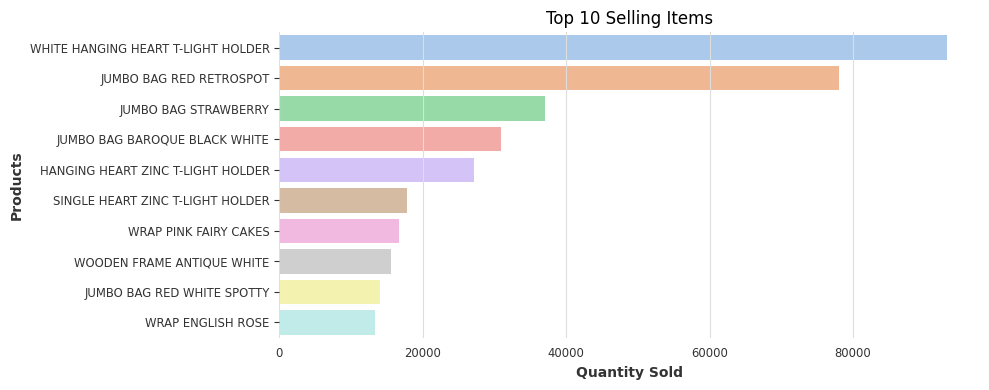

In [44]:
# Top Selling Items
top_n = 10
top_items = df.groupby('Description')['Quantity'].sum().nlargest(top_n).reset_index()
plt.figure(figsize=(10, 4))
custom_colors = sns.color_palette('pastel')[:top_n]
sns.barplot(data=top_items, x='Quantity', y='Description', palette=custom_colors)
plt.title('Top {} Selling Items'.format(top_n))
plt.xlabel('Quantity Sold')
plt.ylabel('Products')
plt.tight_layout()
plt.show()

In [45]:
data

Invoice StockCode                      Description  Quantity  \
1        489434    79323P               PINK CHERRY LIGHTS        12   
2        489434    79323W              WHITE CHERRY LIGHTS        12   
12       489436    48173C             DOOR MAT BLACK FLOCK        10   
23       489436    35004B      SET OF 3 BLACK FLYING DUCKS        12   
28       489436    84596F     SMALL MARSHMALLOWS PINK BOWL         8   
...         ...       ...                              ...       ...   
1067239  581578    84997C  CHILDRENS CUTLERY POLKADOT BLUE         8   
1067270  581579    85099C    JUMBO BAG BAROQUE BLACK WHITE        10   
1067302  581580    84993A        75 GREEN PETIT FOUR CASES         2   
1067308  581580    85049A    TRADITIONAL CHRISTMAS RIBBONS         1   
1067317  581580    85049E        SCANDINAVIAN REDS RIBBONS         2   

                InvoiceDate  Price  Customer ID         Country  
1       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2       2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
12      2009-12-01 09:06:00   5.95      13078.0  United Kingdom  
23      2009-12-01 09:06:00   4.65      13078.0  United Kingdom  
28      2009-12-01 09:06:00   1.25      13078.0  United Kingdom  
...                     ...    ...          ...             ...  
1067239 2011-12-09 12:16:00   4.15      12713.0         Germany  
1067270 2011-12-09 12:19:00   1.79      17581.0  United Kingdom  
1067302 2011-12-09 12:20:00   0.42      12748.0  United Kingdom  
1067308 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  
1067317 2011-12-09 12:20:00   1.25      12748.0  United Kingdom  

[124055 rows x 8 columns]

Let import holidays data becasue most of the sales and demands of products are on holidays so we need to add holidays as well on the dataset

In [46]:
# There are alot countries in this dataset but i'm just adding two country holidays
# countries corresponding codes
countries_and_codes = {
    'UNITED KINGDOM': 'GB',
    'USA': 'US'
}

holiday_data = []

# Getting holidays for each country between 2009 and 2011
for country, country_code in countries_and_codes.items():
    try:
        country_holidays = holidays.CountryHoliday(country_code, years=[2009, 2010, 2011])

        # Append holiday data to the list
        for date, name in sorted(country_holidays.items()):
            holiday_data.append({'date': date, 'holiday': name})
    except:
        print(f'Could not fetch holidays for {country}')

holiday_df = pd.DataFrame(holiday_data)

# Defining start and end dates
start_date = '2009-12-01'
end_date = '2011-12-09'

# Convert 'date' column to datetime
holiday_df['date'] = pd.to_datetime(holiday_df['date'])

# Filtering DataFrame based on date range
filtered_df = holiday_df[holiday_df['date'].between(start_date, end_date)]

# Drop duplicate rows based on 'date' and 'holiday'
filtered_df_no_duplicates = filtered_df.drop_duplicates(subset=['date', 'holiday'])

In [47]:
# Extract days from 'InvoiceDate'
data['month'] = data['InvoiceDate'].dt.month
data['day'] = data['InvoiceDate'].dt.dayofyear
data['weekday'] = data['InvoiceDate'].dt.weekday

<ipython-input-47-6c057f0fa7ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['InvoiceDate'].dt.month
<ipython-input-47-6c057f0fa7ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['InvoiceDate'].dt.dayofyear
<ipython-input-47-6c057f0fa7ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [48]:
data.head()

Invoice StockCode                   Description  Quantity  \
1   489434    79323P            PINK CHERRY LIGHTS        12   
2   489434    79323W           WHITE CHERRY LIGHTS        12   
12  489436    48173C          DOOR MAT BLACK FLOCK        10   
23  489436    35004B   SET OF 3 BLACK FLYING DUCKS        12   
28  489436    84596F  SMALL MARSHMALLOWS PINK BOWL         8   

           InvoiceDate  Price  Customer ID         Country  month  day  \
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  335   
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom     12  335   
12 2009-12-01 09:06:00   5.95      13078.0  United Kingdom     12  335   
23 2009-12-01 09:06:00   4.65      13078.0  United Kingdom     12  335   
28 2009-12-01 09:06:00   1.25      13078.0  United Kingdom     12  335   

    weekday  
1         1  
2         1  
12        1  
23        1  
28        1

In [49]:
# Merge the dataframes
data = pd.merge(data, filtered_df_no_duplicates, how='left', left_on=data['InvoiceDate'].dt.date, right_on=filtered_df_no_duplicates['date'].dt.date)

# List of unique holidays
unique_holidays = filtered_df_no_duplicates['holiday'].unique()

# Create columns for each holiday, fill with 1 if the holiday is observed, else fill with 0
for holiday in unique_holidays:
    data[holiday] = data['holiday'].apply(lambda x: 1 if x == holiday else 0)

# Drop redundant columns
data.drop(['date', 'holiday'], axis=1, inplace=True)

In [50]:
# Selecting the Top 10 Products for making 10 different dataframe of them

stock_codes = ['85099B', '85123A', '85099F', '85099C', '84970S', '84970L', '82494L', '16156S', '16161P', '84997D']

In [51]:
stock_dataframes = {}

In [52]:
for stock_code in stock_codes:
    # Extract data for the current stock code
    product_data = data[data['StockCode'] == stock_code]

    # Handle missing data if needed (example: drop NaN values)
    product_data = product_data.dropna()

    # Check if the DataFrame is not empty
    if not product_data.empty:
        # Set 'InvoiceDate' as the index
        product_data.set_index('InvoiceDate', inplace=True)

        # Resample with the appropriate aggregation method (sum for quantity, etc.)
        product_daily = product_data.resample('D').sum(numeric_only=True)

        # Store the results in the dictionary
        stock_dataframes[stock_code] = product_daily

# Save each stock's DataFrame to a CSV file
for stock_code, stock_dataframe in stock_dataframes.items():
    stock_dataframe.to_csv(f"//content/drive/MyDrive/Data/Top 10 products data/{stock_code}_data.csv", index=True)


In [53]:
# making dataframe of one product with its stock code for model training
product = pd.DataFrame(stock_dataframes['85123A'])

In [54]:
product.head()

Quantity  Price  Customer ID  month   day  weekday  \
InvoiceDate                                                       
2009-12-01        257  45.20     240163.0    192  5360       16   
2009-12-02        267  43.05     231722.0    180  5040       30   
2009-12-03        357  60.75     318920.0    252  7077       63   
2009-12-04        179  37.95     196742.0    156  4394       52   
2009-12-05         96  16.10     101507.0     72  2034       30   

             Christmas Day  Boxing Day  Boxing Day (observed)  New Year's Day  \
InvoiceDate                                                                     
2009-12-01               0           0                      0               0   
2009-12-02               0           0                      0               0   
2009-12-03               0           0                      0               0   
2009-12-04               0           0                      0               0   
2009-12-05               0           0                      0               0   

             ...  Wedding of William and Catherine  \
InvoiceDate  ...                                     
2009-12-01   ...                                 0   
2009-12-02   ...                                 0   
2009-12-03   ...                                 0   
2009-12-04   ...                                 0   
2009-12-05   ...                                 0   

             Martin Luther King Jr. Day  Washington's Birthday  Memorial Day  \
InvoiceDate                                                                    
2009-12-01                            0                      0             0   
2009-12-02                            0                      0             0   
2009-12-03                            0                      0             0   
2009-12-04                            0                      0             0   
2009-12-05                            0                      0             0   

             Independence Day  Independence Day (observed)  Labor Day  \
InvoiceDate                                                             
2009-12-01                  0                            0          0   
2009-12-02                  0                            0          0   
2009-12-03                  0                            0          0   
2009-12-04                  0                            0          0   
2009-12-05                  0                            0          0   

             Columbus Day  Veterans Day  Thanksgiving  
InvoiceDate                                            
2009-12-01              0             0             0  
2009-12-02              0             0             0  
2009-12-03              0             0             0  
2009-12-04              0             0             0  
2009-12-05              0             0             0  

[5 rows x 25 columns]

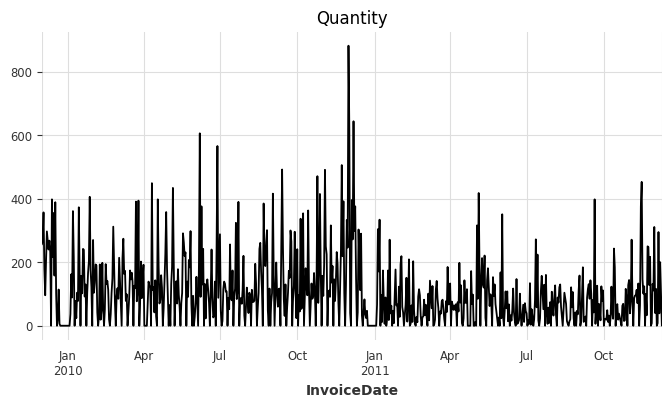

In [55]:
#check quantity values by visualization
new_var = product['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

#  Data Modeling

In [56]:
# split data into test and training
total_length = len(product)
train_size = int(0.80 * total_length)

train_data = product.iloc[:train_size]
test_data = product.iloc[train_size:]

# **LSTM model**

In [57]:
# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data['Quantity'].values.reshape(-1,1))

In [58]:
# Prepare the data for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
X_train, y_train = create_dataset(train_scaled, train_scaled, TIME_STEPS)

In [59]:
X_train.shape

(581, 10, 1)

In [60]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [61]:
# Fit the LSTM model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

Epoch 1/100
15/15 [==============================] - 4s 38ms/step - loss: 0.0269 - val_loss: 0.0095
Epoch 2/100
15/15 [==============================] - 0s 18ms/step - loss: 0.0187 - val_loss: 0.0097
Epoch 3/100
15/15 [==============================] - 0s 31ms/step - loss: 0.0187 - val_loss: 0.0085
Epoch 4/100
15/15 [==============================] - 1s 35ms/step - loss: 0.0184 - val_loss: 0.0092
Epoch 5/100
15/15 [==============================] - 1s 34ms/step - loss: 0.0184 - val_loss: 0.0087
Epoch 6/100
15/15 [==============================] - 0s 32ms/step - loss: 0.0184 - val_loss: 0.0087
Epoch 7/100
15/15 [==============================] - 0s 29ms/step - loss: 0.0183 - val_loss: 0.0086
Epoch 8/100
15/15 [==============================] - 0s 30ms/step - loss: 0.0183 - val_loss: 0.0085
Epoch 9/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0183 - val_loss: 0.0085
Epoch 10/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0183 - val_loss: 0.0084

In [62]:
# make prediction on testing data
test_scaled = scaler.transform(test_data['Quantity'].values.reshape(-1,1))
X_test, y_test = create_dataset(test_scaled, test_scaled, TIME_STEPS)

predictions = model.predict(X_test)

# Invert scaling for predictions and actual
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

5/5 [==============================] - 0s 5ms/step


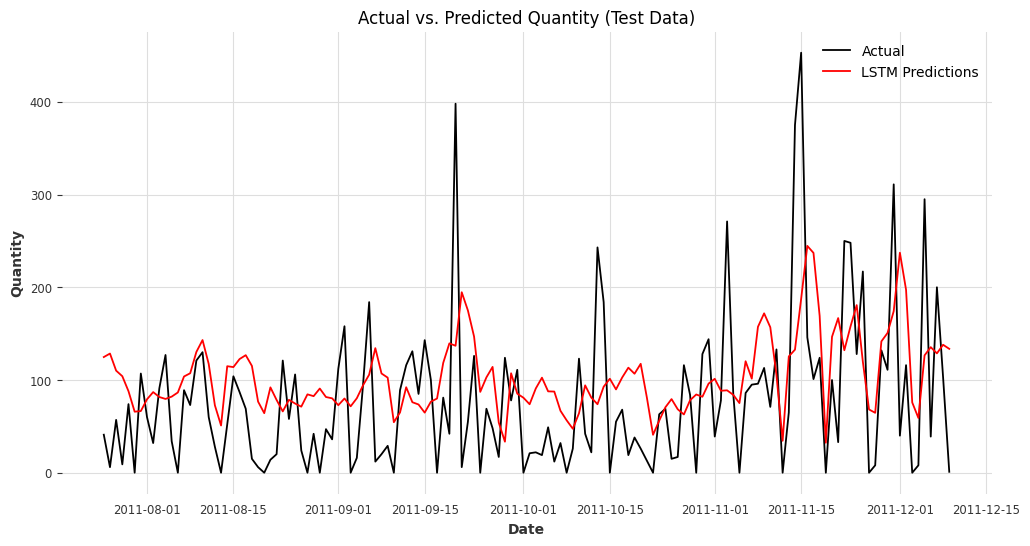

In [63]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[TIME_STEPS:], actual, label='Actual')
plt.plot(test_data.index[TIME_STEPS:], predictions, color='red', label='LSTM Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


**ARIMA model**

In [64]:
product['Quantity']

InvoiceDate
2009-12-01    257
2009-12-02    267
2009-12-03    357
2009-12-04    179
2009-12-05     96
             ... 
2011-12-05    295
2011-12-06     39
2011-12-07    200
2011-12-08    103
2011-12-09      1
Freq: D, Name: Quantity, Length: 739, dtype: int64

In [118]:
# Set the default color cycle to blue
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['black'])

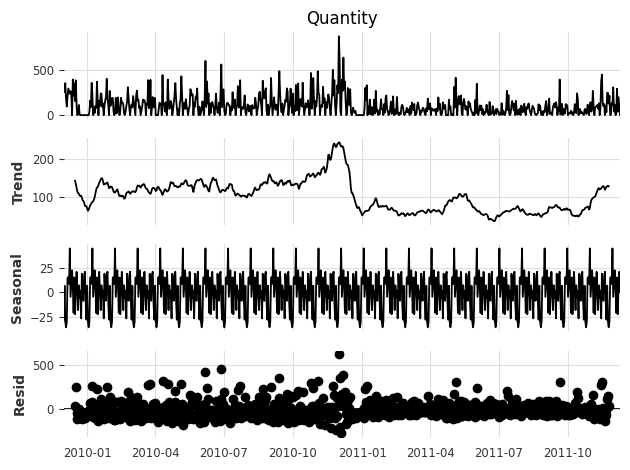

In [119]:
# lets check the trend and seasonality graph
analysis = product['Quantity'].copy()

decompose_result_add = seasonal_decompose(analysis, model="additive", period =30)

trend = decompose_result_add.trend
seasonal = decompose_result_add.seasonal
residual = decompose_result_add.resid

decompose_result_add.plot()
plt.show()

In [66]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))

    # Check whether the data is statioanry or non-stationary
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis. Reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against the null hypothesis which indicating data is non-stationary")

With the help of ADfuller you can see that the data is already stationary so there is no need to do differencing for make it statiionary

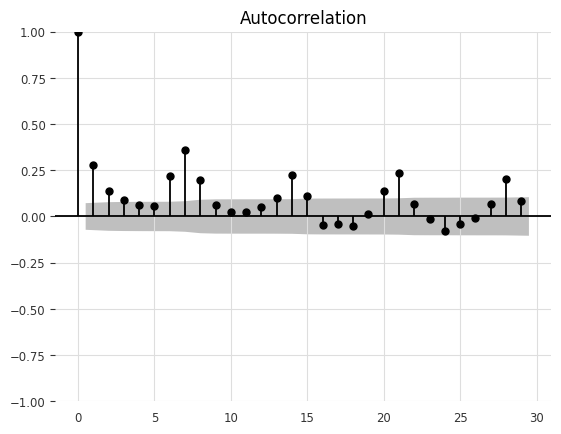

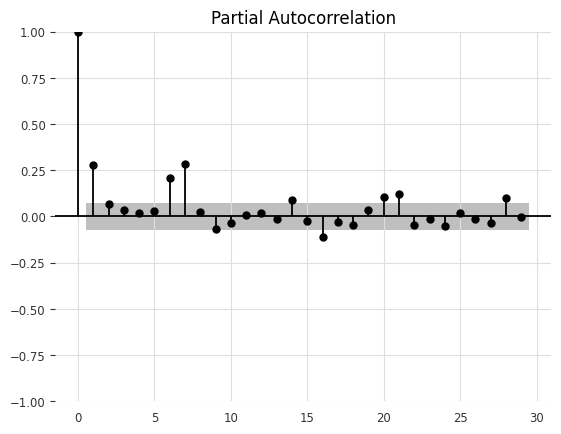

In [67]:
#AutoCorrelation and Partial Correlation Plots of data
acf12 = plot_acf(product["Quantity"].dropna())
pacf12 = plot_pacf(product["Quantity"].dropna())

In [68]:
from statsmodels.tsa.arima.model import ARIMA
# setting parameters for ARIMA model
order = (5,1,0)
model = ARIMA(train_data['Quantity'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  591
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3629.760
Date:                Wed, 15 May 2024   AIC                           7271.520
Time:                        01:59:05   BIC                           7297.801
Sample:                    12-01-2009   HQIC                          7281.758
                         - 07-14-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6433      0.034    -19.176      0.000      -0.709      -0.578
ar.L2         -0.5195      0.036    -14.339      0.000      -0.591      -0.448
ar.L3         -0.4288      0.041    -10.352      0.0

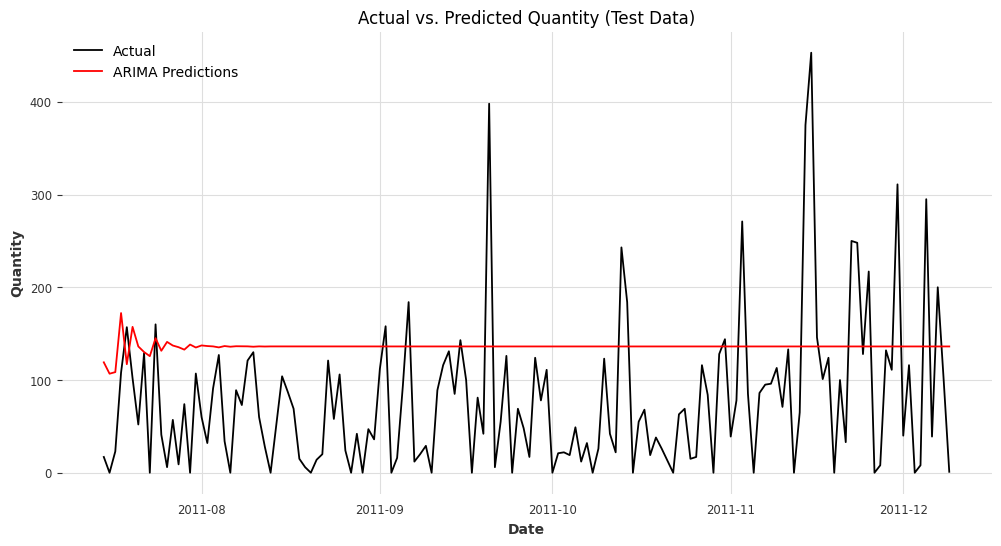

In [107]:
# Plot the actual vs. predicted values on the test data
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual')
plt.plot(test_data.index, model_fit.forecast(steps=len(test_data)), color='red', label='ARIMA Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

**SARIMA model**

In [70]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX model
model_SARIMA = SARIMAX(endog=train_data['Quantity'],
                       order=(2, 1, 3),
                       seasonal_order=(1, 1, 1, 12)
                      )
model_SARIMA_fit = model_SARIMA.fit()

model_SARIMA_fit.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             Quantity   No. Observations:                  591
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -3600.024
Date:                              Wed, 15 May 2024   AIC                           7216.048
Time:                                      01:59:15   BIC                           7250.925
Sample:                                  12-01-2009   HQIC                          7229.647
                                       - 07-14-2011                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2466      0.003    366.944      0.000       1.240       1.253
ar.L2         -0.9994      0.003   -372.891      0.000      -1.005      -0.994
ma.L1         -2.1326      0.054    -39.799      0.000      -2.238      -2.028
ma.L2          2.1057      0.114     18.494      0.000       1.883       2.329
ma.L3         -0.8931      0.067    -13.293      0.000      -1.025      -0.761
ar.S.L12       0.1727      0.097      1.778      0.075      -0.018       0.363
ma.S.L12      -0.9881      0.236     -4.184      0.000      -1.451      -0.525
sigma2      2.238e+04   4680.334      4.781      0.000    1.32e+04    3.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.51   Jarque-Bera (JB):               673.45
Prob(Q):                              0.11   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
# Set the start and end dates for predictions
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

# Print the start and end dates
print(pred_start_date)
print(pred_end_date)

2011-07-15 00:00:00
2011-12-09 00:00:00


In [72]:
from datetime import datetime, timedelta

# Set the start and end dates for predictions manually
pred_start_date = datetime(2011, 7, 15)
pred_end_date = datetime(2011, 12, 9)

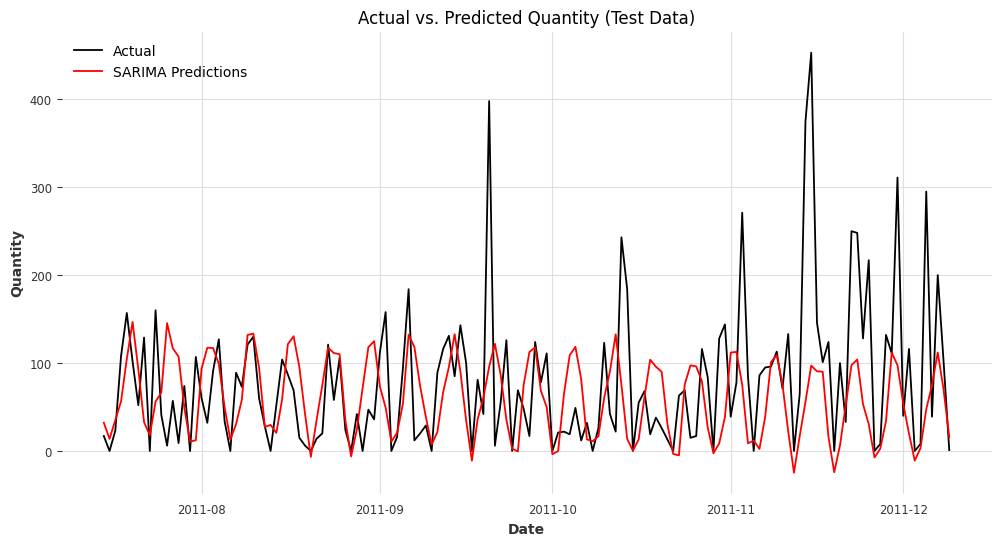

In [73]:
df_forecast = pd.DataFrame()
df_forecast['forecast'] = model_SARIMA_fit.predict(start=pred_start_date, end=pred_end_date,
                                                   dynamic=True)

# plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual')
plt.plot(test_data.index, df_forecast['forecast'], color='red', label='SARIMA Predictions')
plt.title('Actual vs. Predicted Quantity (Test Data)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

# **DARTS library Models**

In [74]:
product

Quantity  Price  Customer ID  month   day  weekday  \
InvoiceDate                                                       
2009-12-01        257  45.20     240163.0    192  5360       16   
2009-12-02        267  43.05     231722.0    180  5040       30   
2009-12-03        357  60.75     318920.0    252  7077       63   
2009-12-04        179  37.95     196742.0    156  4394       52   
2009-12-05         96  16.10     101507.0     72  2034       30   
...               ...    ...          ...    ...   ...      ...   
2011-12-05        295  37.04     177857.0    144  4068        0   
2011-12-06         39  11.80      57762.0     48  1360        4   
2011-12-07        200  31.25     172452.0    132  3751       22   
2011-12-08        103  31.65     174924.0    132  3762       33   
2011-12-09          1   2.95      14446.0     12   343        4   

             Christmas Day  Boxing Day  Boxing Day (observed)  New Year's Day  \
InvoiceDate                                                                     
2009-12-01               0           0                      0               0   
2009-12-02               0           0                      0               0   
2009-12-03               0           0                      0               0   
2009-12-04               0           0                      0               0   
2009-12-05               0           0                      0               0   
...                    ...         ...                    ...             ...   
2011-12-05               0           0                      0               0   
2011-12-06               0           0                      0               0   
2011-12-07               0           0                      0               0   
2011-12-08               0           0                      0               0   
2011-12-09               0           0                      0               0   

             ...  Wedding of William and Catherine  \
InvoiceDate  ...                                     
2009-12-01   ...                                 0   
2009-12-02   ...                                 0   
2009-12-03   ...                                 0   
2009-12-04   ...                                 0   
2009-12-05   ...                                 0   
...          ...                               ...   
2011-12-05   ...                                 0   
2011-12-06   ...                                 0   
2011-12-07   ...                                 0   
2011-12-08   ...                                 0   
2011-12-09   ...                                 0   

             Martin Luther King Jr. Day  Washington's Birthday  Memorial Day  \
InvoiceDate                                                                    
2009-12-01                            0                      0             0   
2009-12-02                            0                      0             0   
2009-12-03                            0                      0             0   
2009-12-04                            0                      0             0   
2009-12-05                            0                      0             0   
...                                 ...                    ...           ...   
2011-12-05                            0                      0             0   
2011-12-06                            0                      0             0   
2011-12-07                            0                      0             0   
2011-12-08                            0                      0             0   
2011-12-09                            0                      0             0   

             Independence Day  Independence Day (observed)  Labor Day  \
InvoiceDate                                                             
2009-12-01                  0                            0          0   
2009-12-02                  0                            0          0   
2009-12-03                  0                      

In [75]:
# Directory where CSV files are stored
csv_directory = "/content/drive/MyDrive/Data/Top 10 products data"

all_stock_dataframes = {}

# Iterating through CSV files in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith("_data.csv"):
        # Construct the full file path
        file_path = os.path.join(csv_directory, filename)

        # Read CSV into a DataFrame and append to the list
        stock_dataframe = pd.read_csv(file_path, parse_dates=['InvoiceDate'], index_col='InvoiceDate')
        all_stock_dataframes[filename] = stock_dataframe



In [76]:
# Droping 'Customer ID' and 'Price' columns from all products in all_stock_dataframes
for file_name in all_stock_dataframes:
    all_stock_dataframes[file_name].drop(columns=['Customer ID', 'Price'], inplace=True)


In [77]:

# Dictionary to store TimeSeries objects for each product
all_stock_dataframes_timeseries = {}

# Convert DataFrames to TimeSeries
for file_name in all_stock_dataframes:
    # Create TimeSeries object from DataFrame, considering 'Quantity' as the value column
    all_stock_dataframes_timeseries[file_name] = TimeSeries.from_dataframe(all_stock_dataframes[file_name], value_cols='Quantity')


In [78]:
# Dictionary to store TimeSeries objects for each product
all_stock_dataframes_timeseries_temp = {}

# Convert DataFrames to TimeSeries with all columns (except the first) as value columns
for file_name in all_stock_dataframes:
    # Create TimeSeries object from DataFrame, considering all columns (except the first) as value columns
    all_stock_dataframes_timeseries_temp[file_name] = TimeSeries.from_dataframe(
        all_stock_dataframes[file_name],
        value_cols=all_stock_dataframes[file_name].columns[1:]
    )


**Scaling dataset**

In [79]:
# Create dictionaries to store scalers and scaled time series for each stock code
scalers_timeseries = {}
scalers_timeseries_temp = {}
all_stock_dataframes_timeseries_scaled = {}
all_stock_dataframes_timeseries_temp_scaled = {}

# Iterate through the TimeSeries objects in the dictionaries
for file_name in all_stock_dataframes_timeseries:
    scaler = Scaler()

    # Fit the scaler on the TimeSeries and transform it
    scaled_data = scaler.fit_transform(all_stock_dataframes_timeseries[file_name])

    # Store the scaler in the dictionary
    scalers_timeseries[file_name] = scaler

    # Update the dictionary with the scaled TimeSeries
    all_stock_dataframes_timeseries_scaled[file_name] = scaled_data

# Repeat the process for the second set of TimeSeries
for file_name in all_stock_dataframes_timeseries_temp:
    scaler = Scaler()

    scaled_data = scaler.fit_transform(all_stock_dataframes_timeseries_temp[file_name])

    # Store the scaler in the dictionary
    scalers_timeseries_temp[file_name] = scaler

    # Update the dictionary with the scaled TimeSeries
    all_stock_dataframes_timeseries_temp_scaled[file_name] = scaled_data


**Splitting dataset for training and testing**

In [80]:
# Dictionaries to store training and validation sets for each stock code
training_data = {}
val_data = {}

# Iterate through the scaled TimeSeries objects
for file_name in all_stock_dataframes_timeseries_scaled:
    # Split the TimeSeries into training and validation sets
    train, val = all_stock_dataframes_timeseries_scaled[file_name][:-36], all_stock_dataframes_timeseries_scaled[file_name][-36:]

    # Store the training and validation sets in the dictionaries
    training_data[file_name], val_data[file_name] = train, val


**Initializing models**

In [81]:
# initializing function for training models
def eval_model(model_type):


    # Initialize the model based on the specified type
    if model_type == 'NBEATSModel':
        model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=20, random_state=0, activation='LeakyReLU')
    elif model_type == 'TiDEModel':
        model = TiDEModel(input_chunk_length=24, output_chunk_length=12, n_epochs=50)
    elif model_type == 'BlockRNN_test':
        model_name = "BlockRNN_test"
        model = BlockRNNModel(model="LSTM", input_chunk_length=24, output_chunk_length=12, n_epochs=50, random_state=0, model_name=model_name, save_checkpoints=True, force_reset=True)
    elif model_type == 'TCN_model':
        model_name = "TCN_model"
        model = TCNModel(
            input_chunk_length=24,
            output_chunk_length=12,
            n_epochs=200,
            dropout=0.1,
            dilation_base=2,
            weight_norm=True,
            kernel_size=5,
            num_filters=3,
            random_state=0,
            save_checkpoints=True,
            model_name=model_name,
            force_reset=True,
        )
    else:
        print('No model found')
        return None

    # Train the model
    start_time = datetime.now()
    model.fit([training_data[key] for key in training_data], past_covariates=[all_stock_dataframes_timeseries_temp_scaled[key] for key in all_stock_dataframes_timeseries_temp_scaled], verbose=True)
    time_elapsed = datetime.now() - start_time

    return model


In [82]:
# this function used for making prediction and compare with actual values
def model_predict(model):

    for key in training_data:
        # Make predictions for the validation set
        pred = model.predict(n=36, series=training_data[key], past_covariates=all_stock_dataframes_timeseries_temp_scaled[key])

        # Extract actual and predicted time series data
        actual = val_data[key][-36:].values().reshape(-1, 1)
        predicted = pred.values().reshape(-1, 1)

        # Calculate metrics
        mae = mean_absolute_error(actual, predicted)
        mse = mean_squared_error(actual, predicted)
        rmse = np.sqrt(mse)

        # Display metrics
        print('Metrics for Model Evaluation')
        print('Mean Absolute Error (MAE): {:.2f}'.format(mae))
        print('Mean Squared Error (MSE): {:.2f}'.format(mse))
        print('Root Mean Squared Error (RMSE): {:.2f}'.format(rmse))


        # Visualize actual vs. predicted time series data
        plt.figure(figsize=(10, 6))
        val_data[key][-36:].plot(label='Actual')
        pred.plot(label='Forecast')
        plt.title(f"Stock: {key}")
        plt.xlabel("Date")
        plt.ylabel("Quantity")
        plt.legend()
        plt.show()


**NBEATSModel**

In [83]:
# Train NBEATSModel
model_Nbeatsmodel = eval_model('NBEATSModel')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 10.4 M
---------------------------------------------------
10.4 M    Trainable params
4.6 K     Non-trainable params
10.4 M    Total params
41.578    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


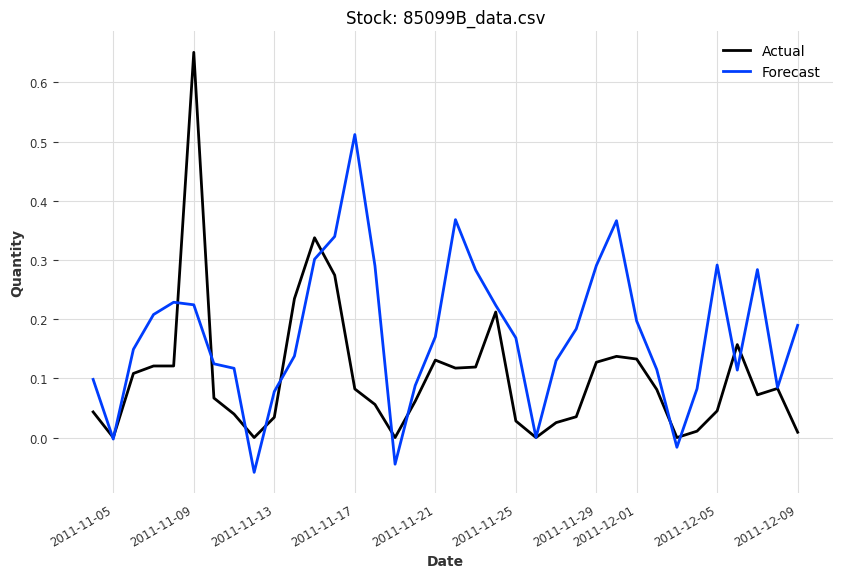

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


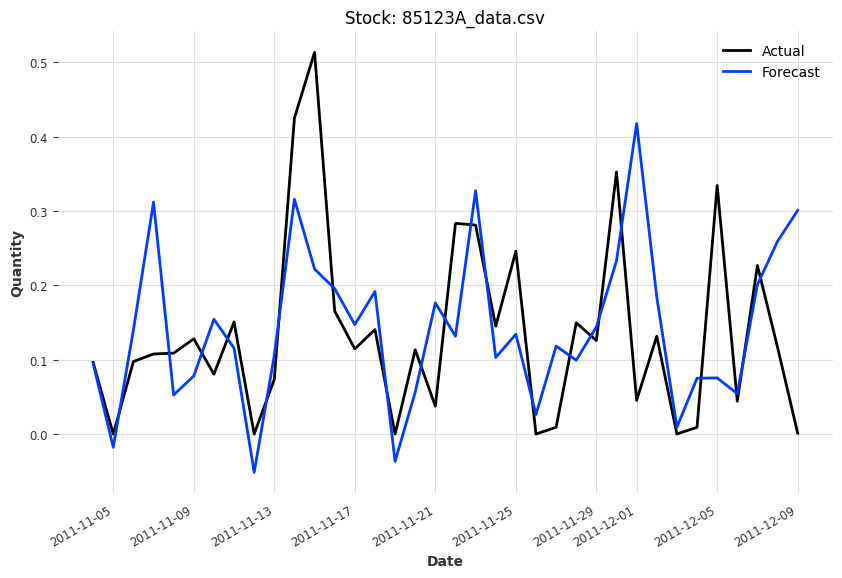

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10


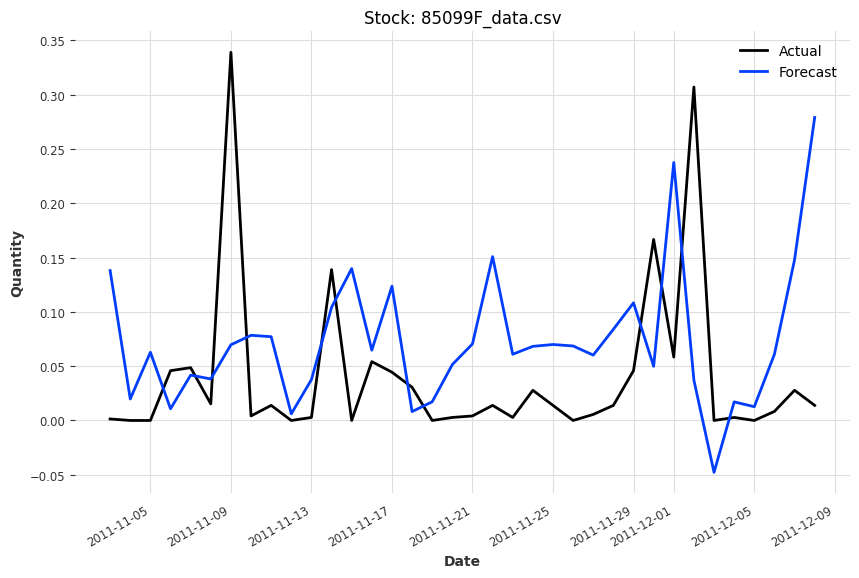

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11


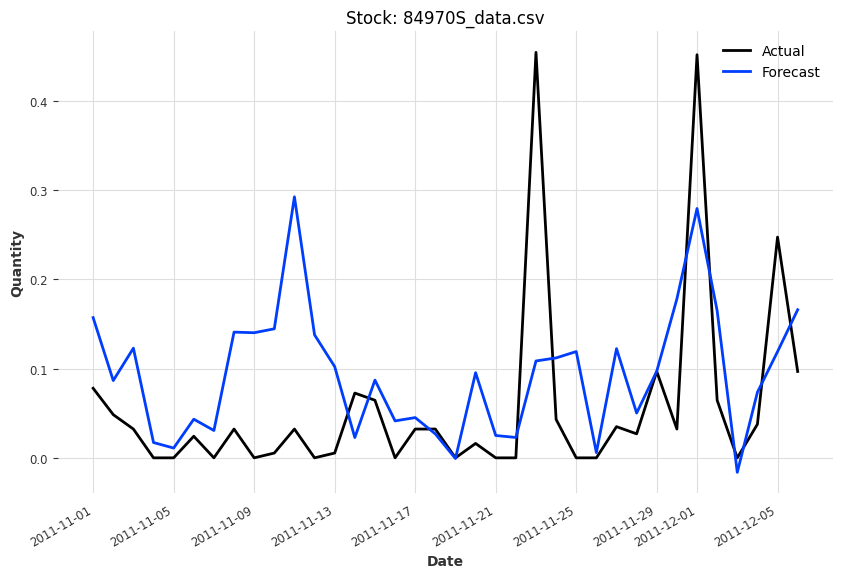

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.13


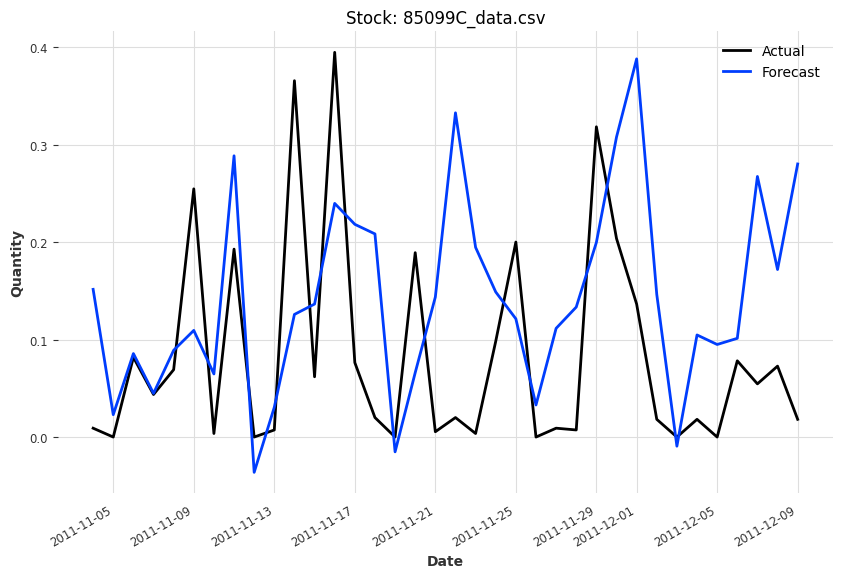

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


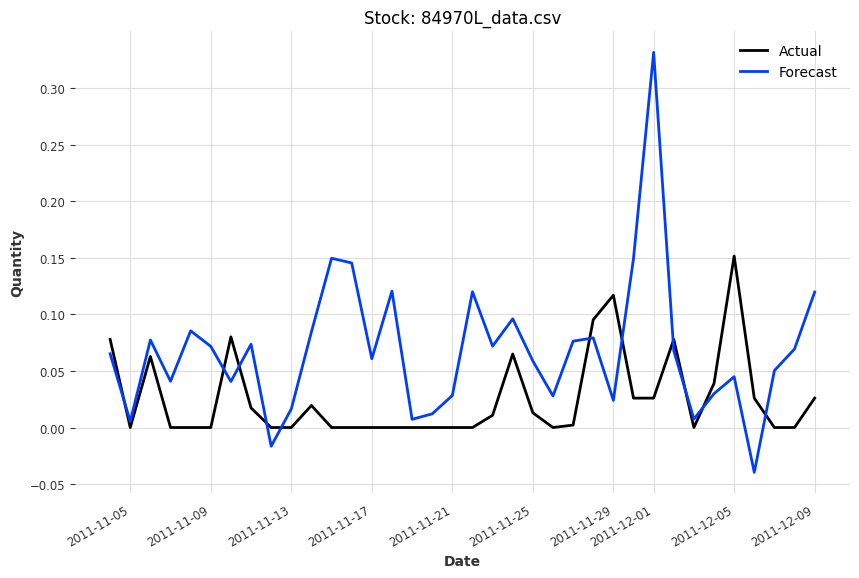

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16


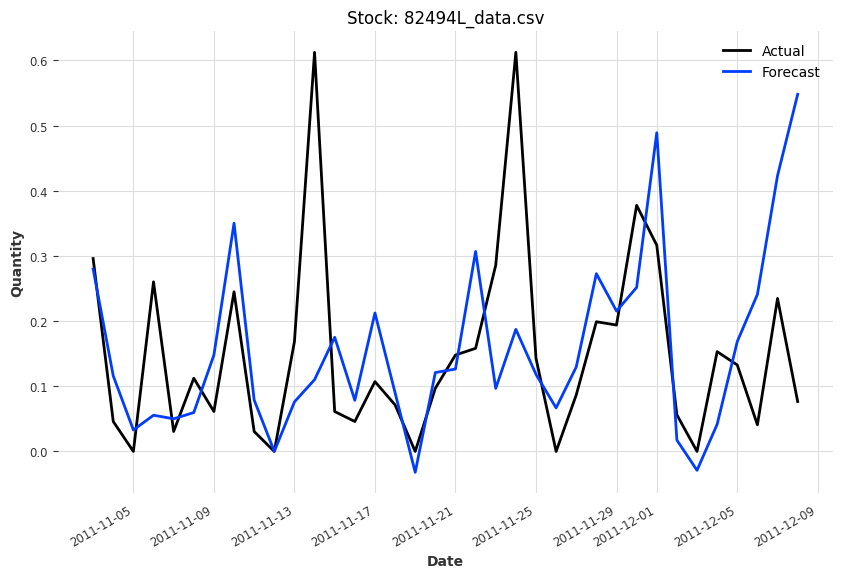

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07


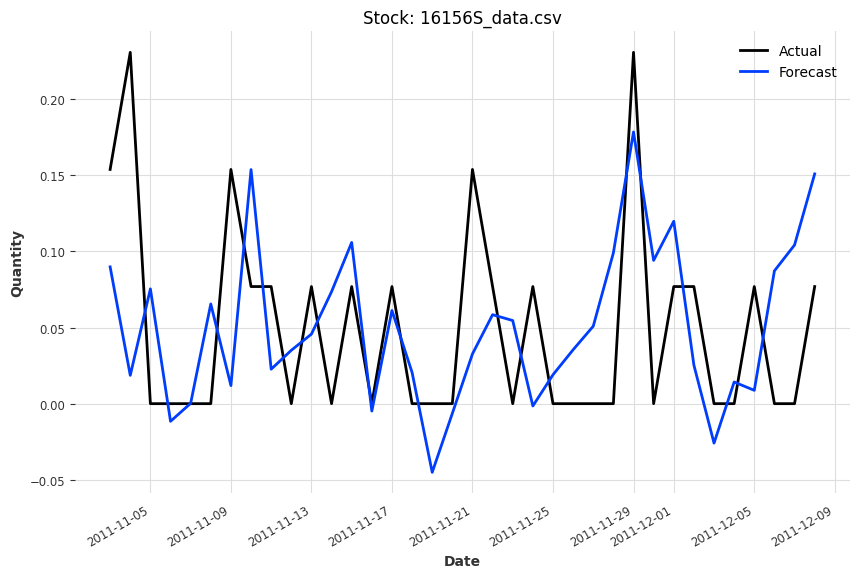

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


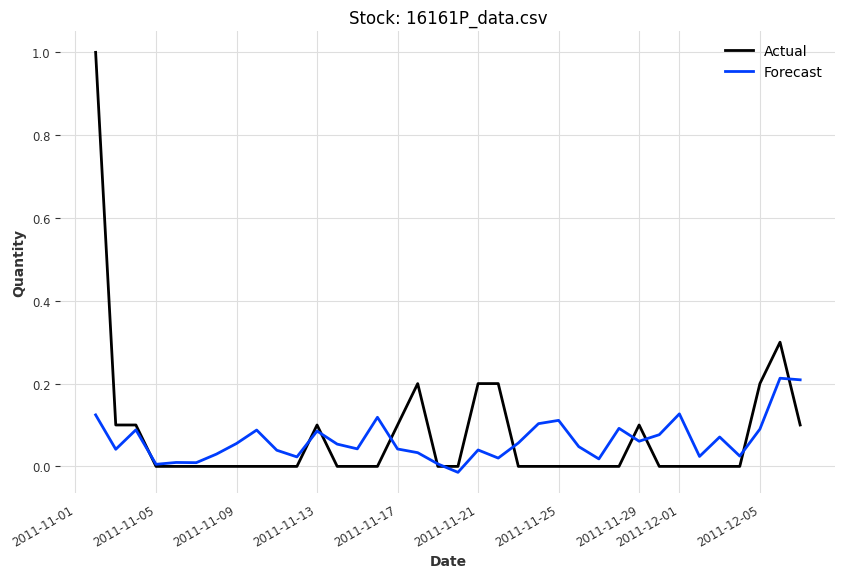

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16


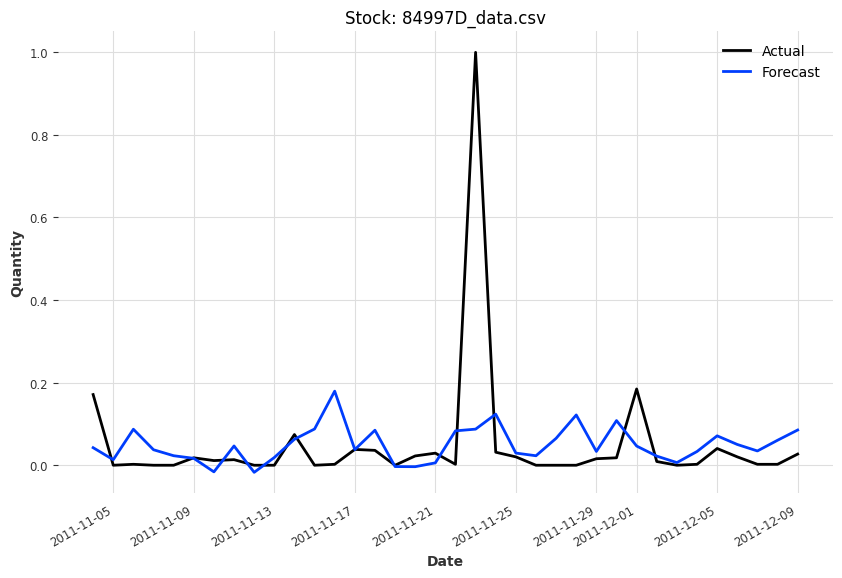

In [84]:
#Predicting model on every product
model_predict(model_Nbeatsmodel)

**TiDE Model**

In [85]:
#Training TiDEModel
TiDEModel = eval_model('TiDEModel')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name                | Type             | Params
---------------------------------------------------------
0 | criterion           | MSELoss          | 0     
1 | train_metrics       | MetricCollection | 0     
2 | val_metrics         | MetricCollection | 0     
3 | past_cov_projection | _ResidualBlock   | 3.6 K 
4 | encoders            | Sequential       | 47.5 K
5 | decoders            | Sequential       | 66.0 K
6 | temporal_decoder    | _ResidualBlock   | 594   
7 | lookback_skip       | Linear           | 300   
-------------------

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.19


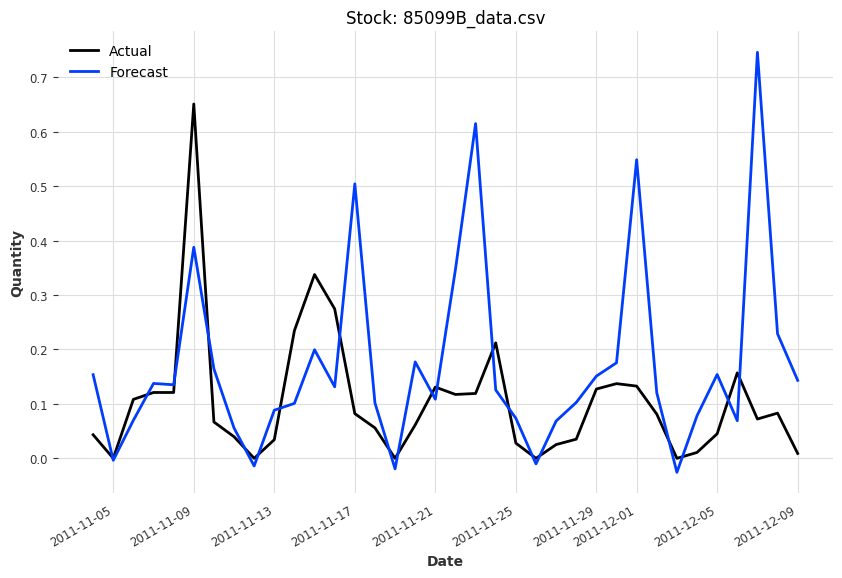

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16


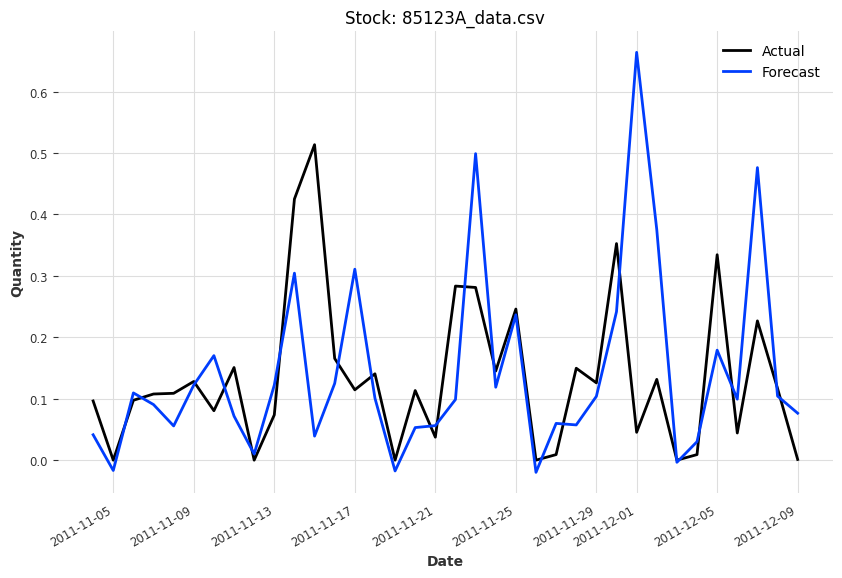

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10


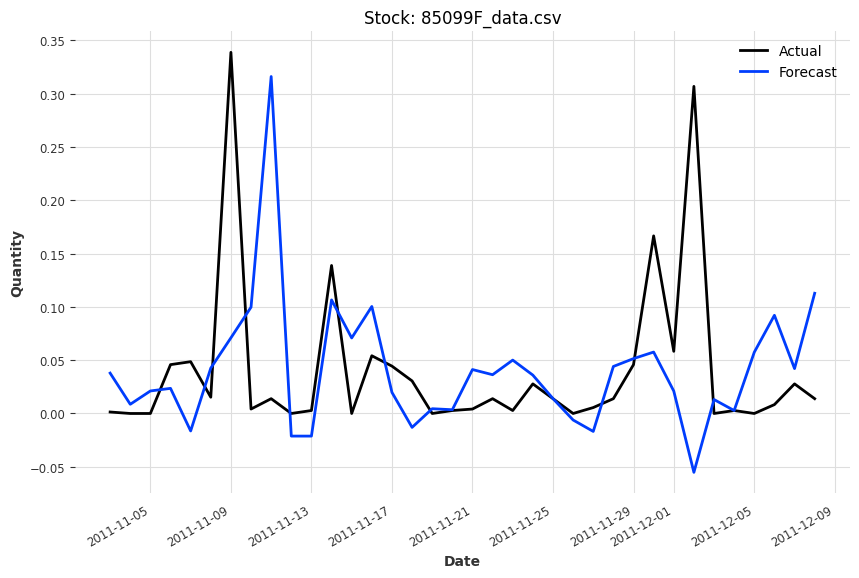

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


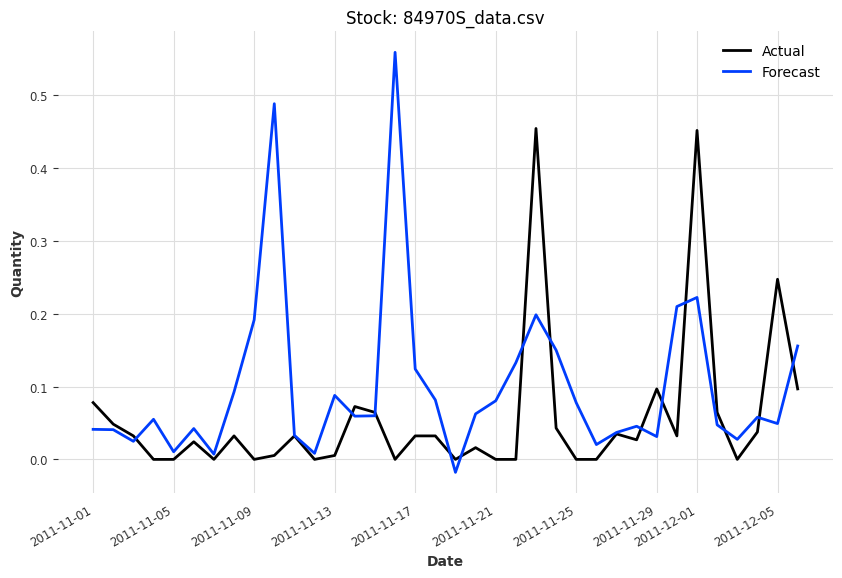

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12


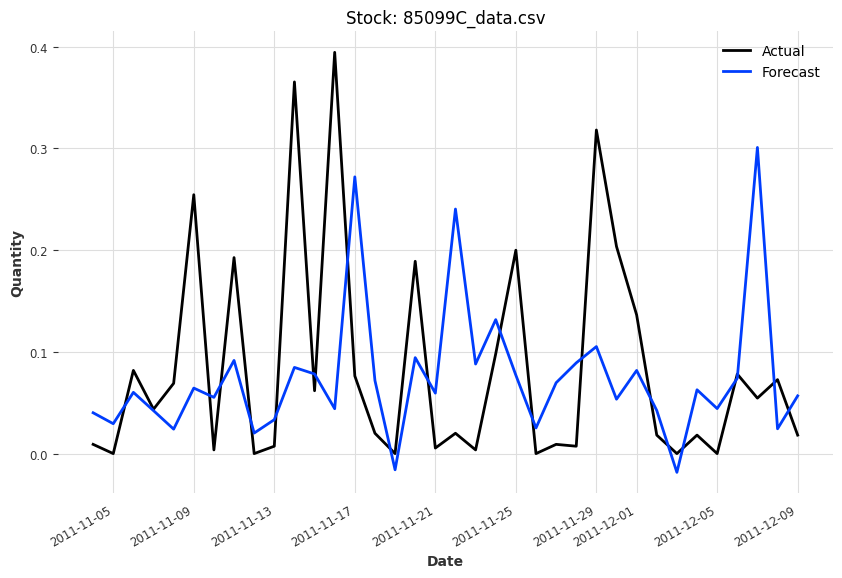

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


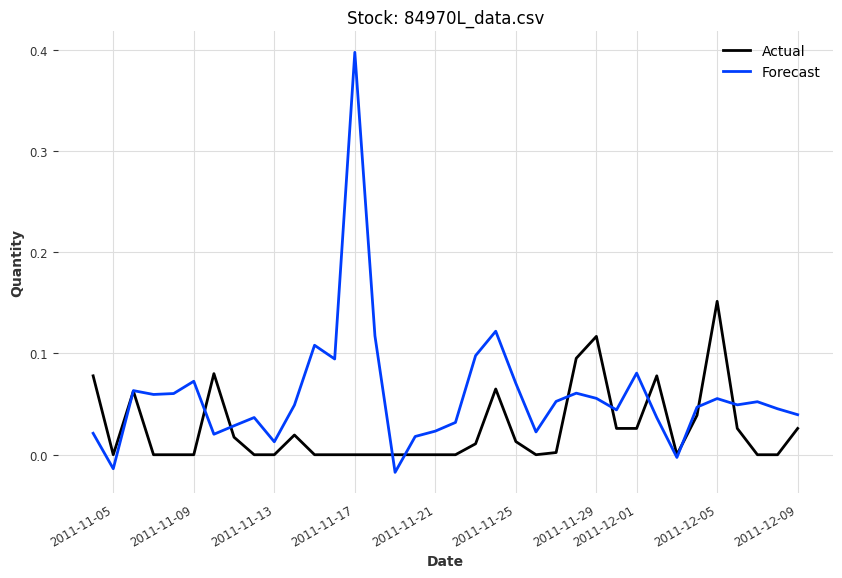

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.21


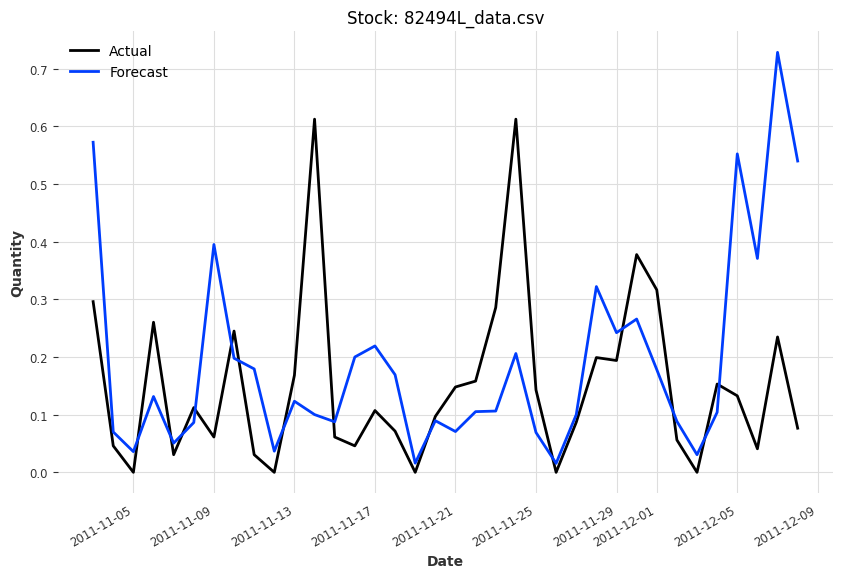

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16


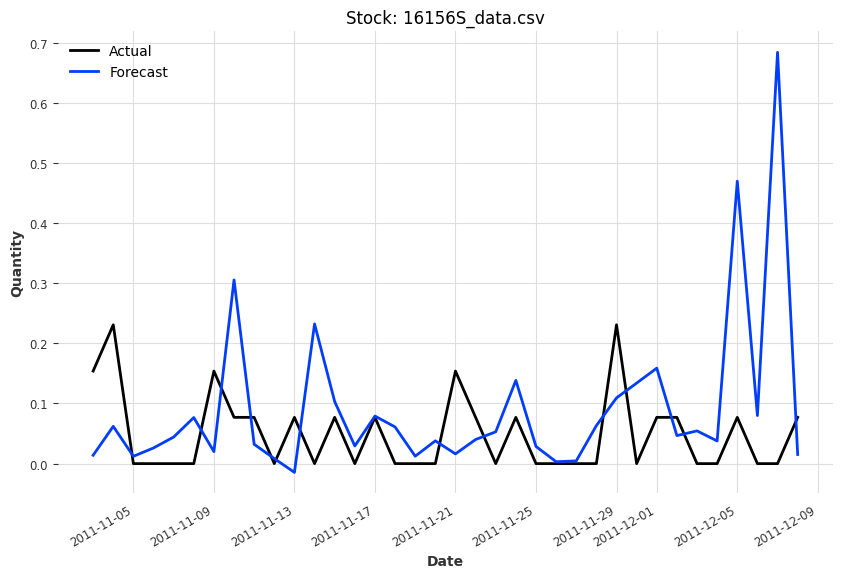

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18


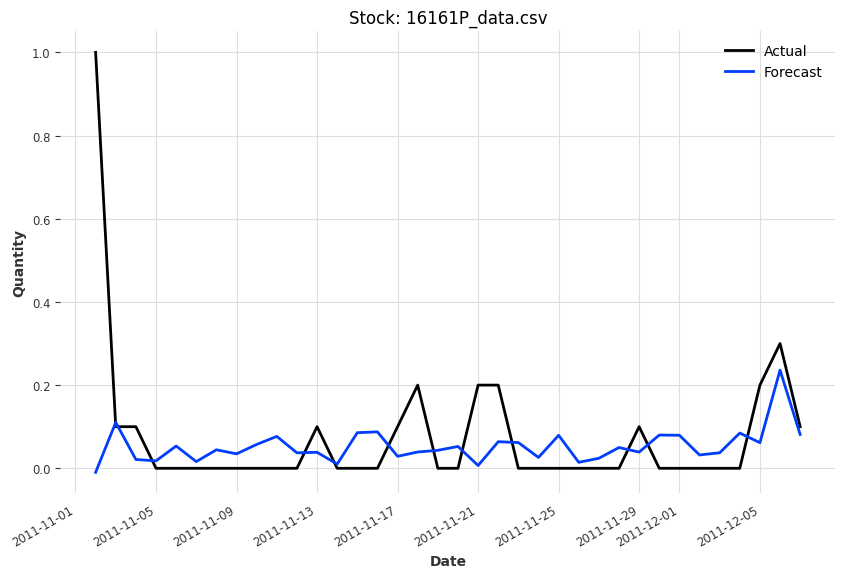

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


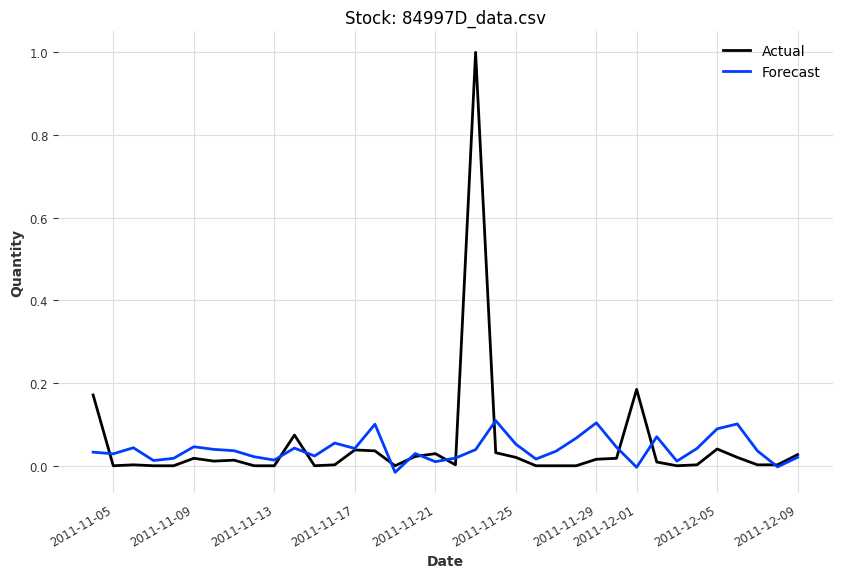

In [86]:
#Predicting Model
model_predict(TiDEModel)

**BlockRNN_test Model**

In [87]:
#Training BlockRNN_test Model
BlockRNN_test = eval_model('BlockRNN_test')

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 5.0 K 
4 | fc            | Sequential       | 312   
---------------------------------------------------
5.3 K     Trainable params
0         Non-trainable params
5.3 K     Total params
0.021     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:383: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18


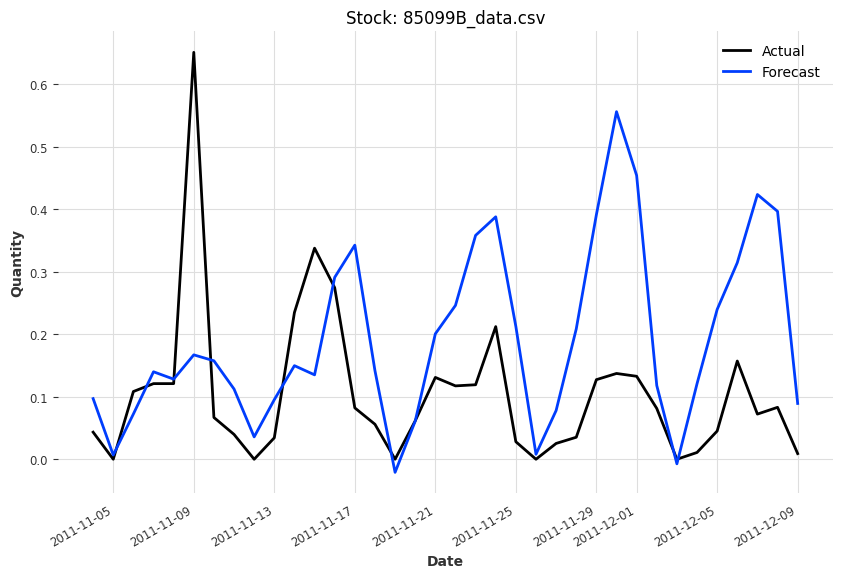

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20


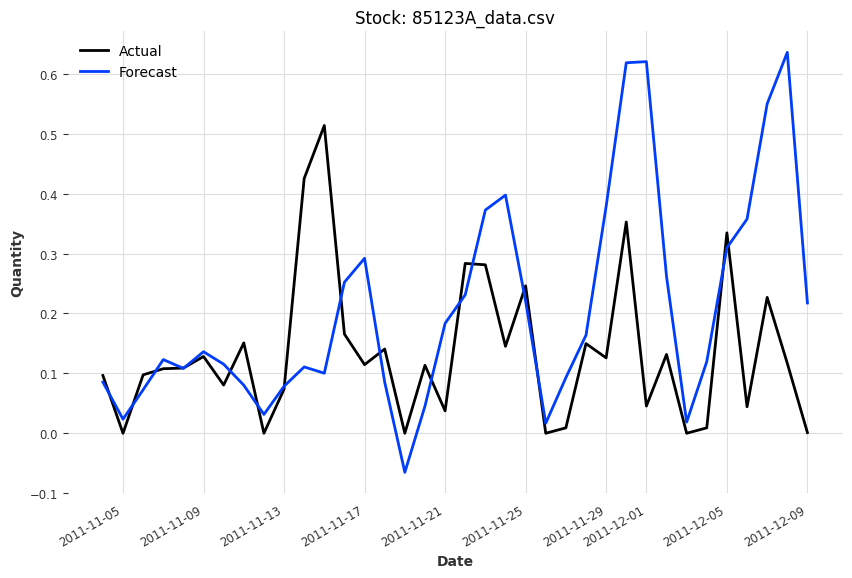

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


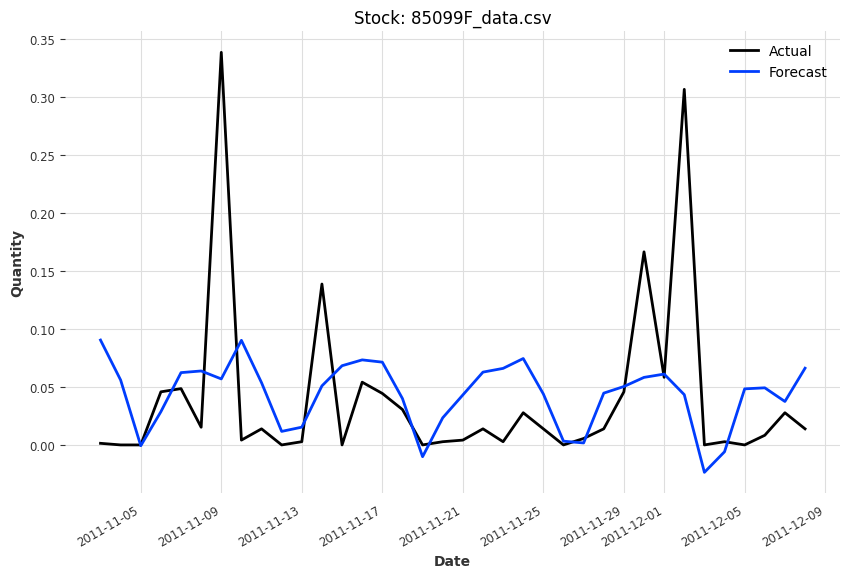

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10


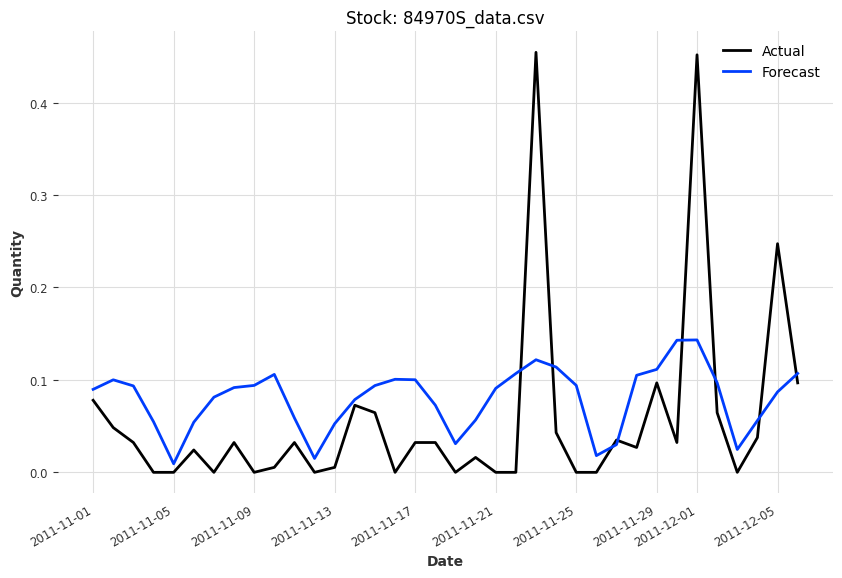

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11


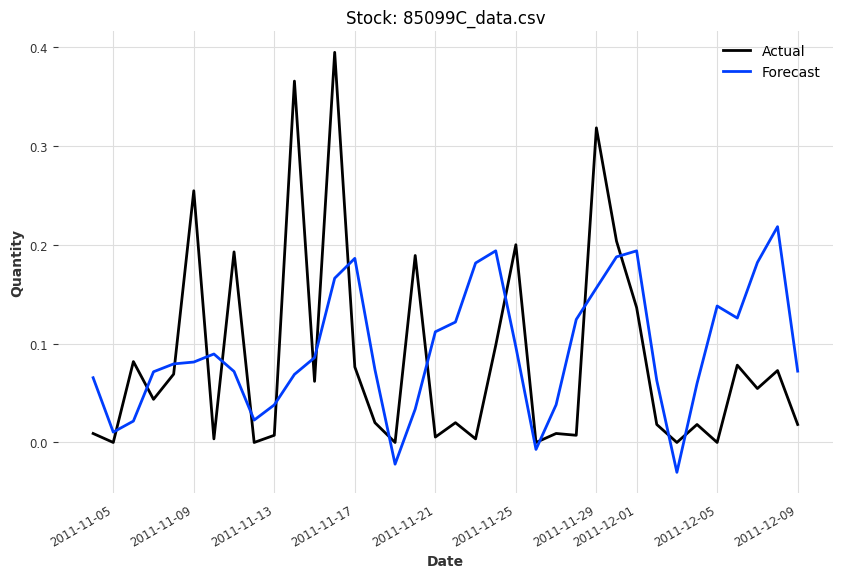

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.05
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.06


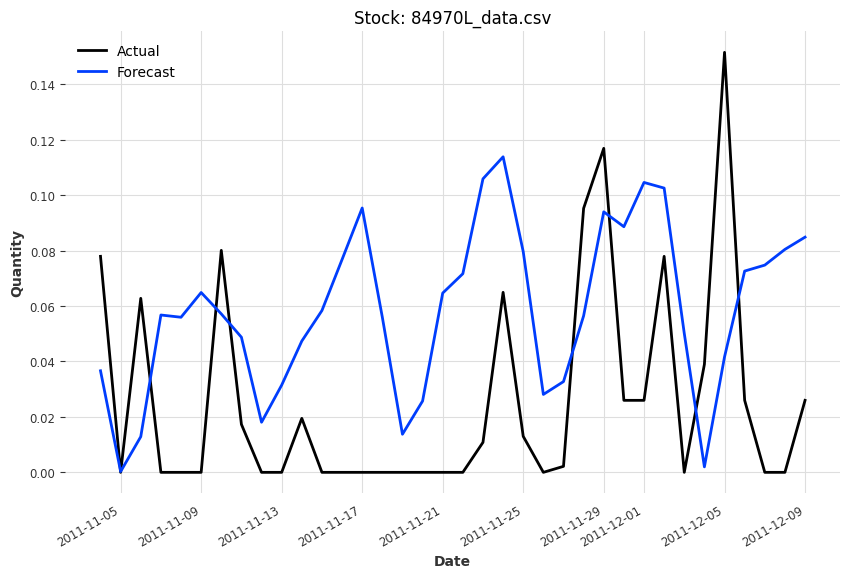

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


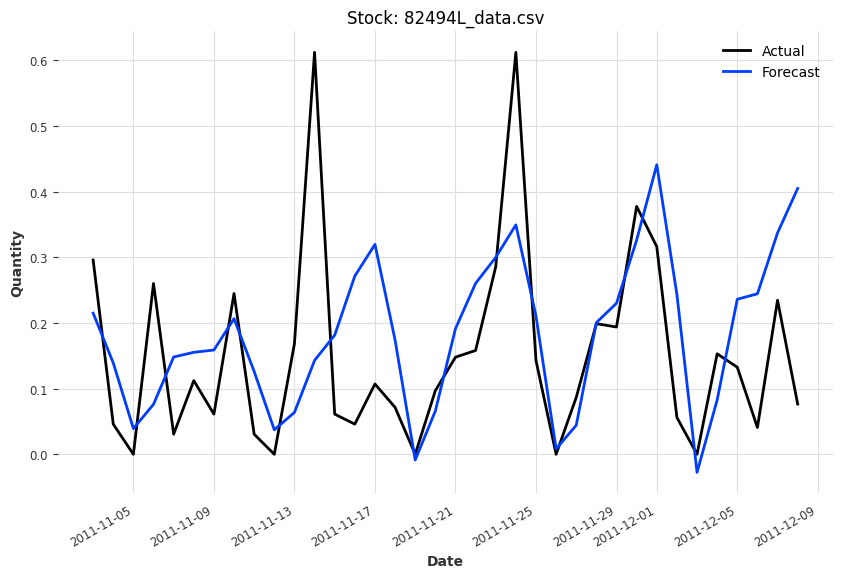

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


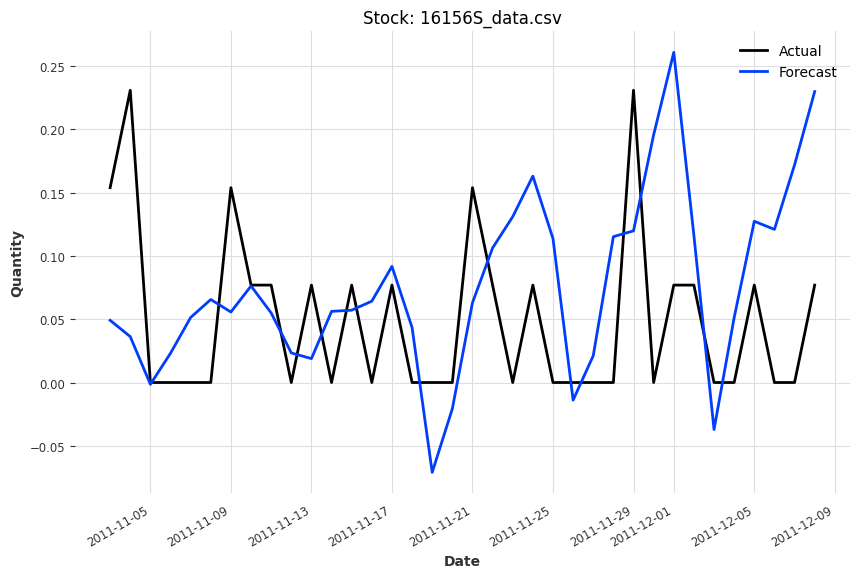

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.17


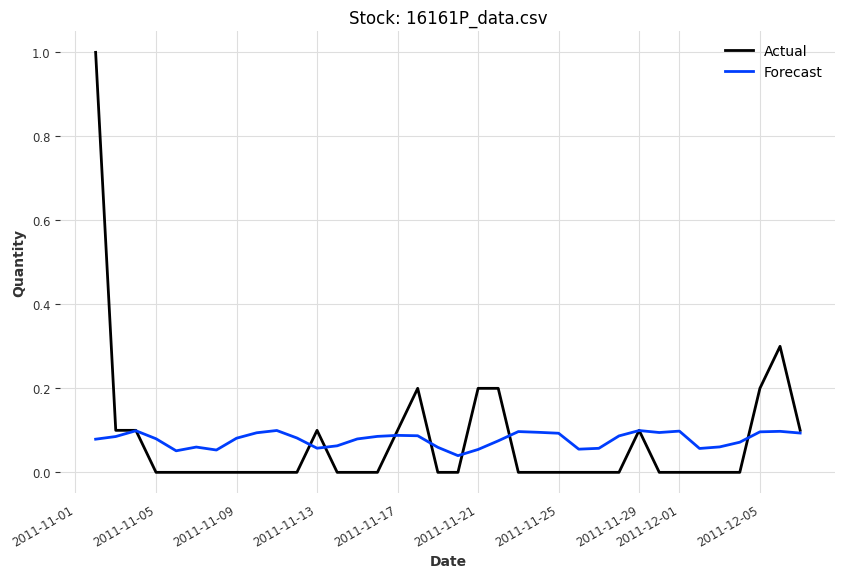

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.16


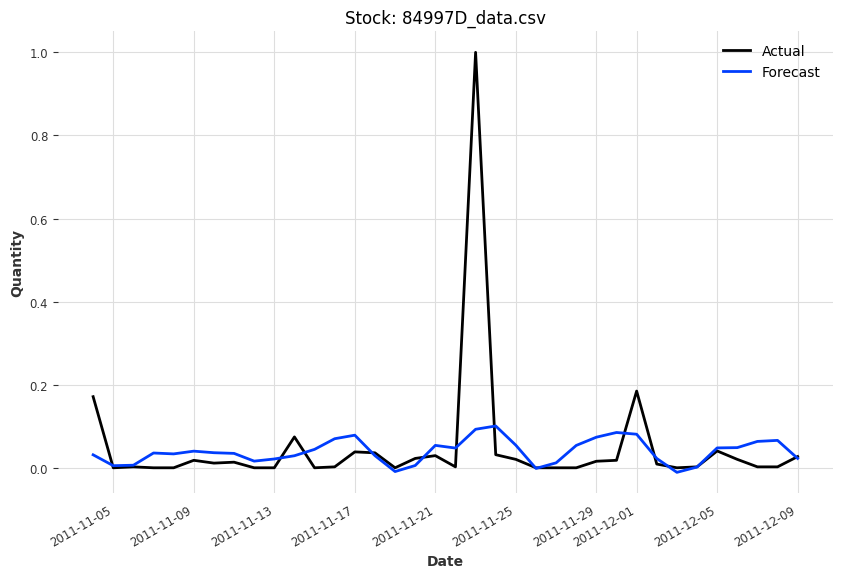

In [88]:
model_predict(BlockRNN_test)

**TCN_model**

In [89]:
#Training TCN_model
TCN_model = eval_model('TCN_model')

/usr/local/lib/python3.10/dist-packages/torch/nn/utils/weight_norm.py:28: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | res

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11


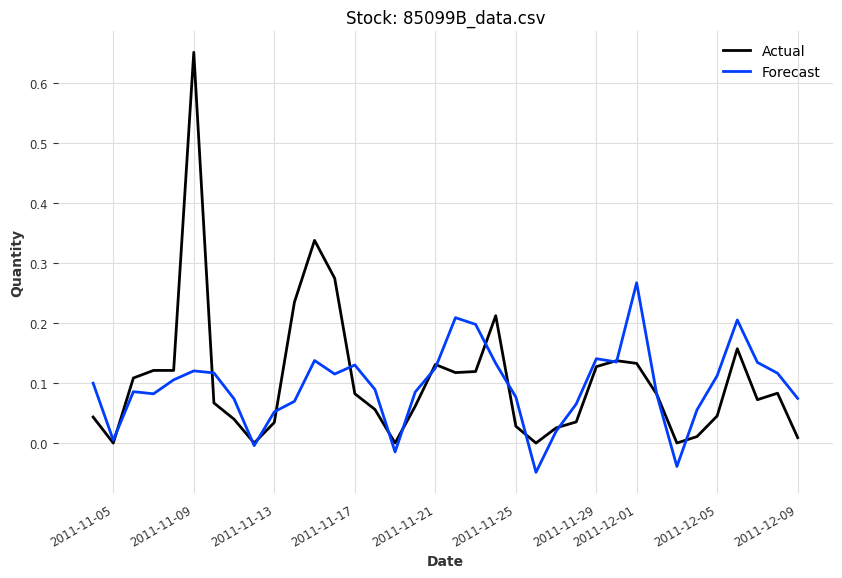

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.08
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14


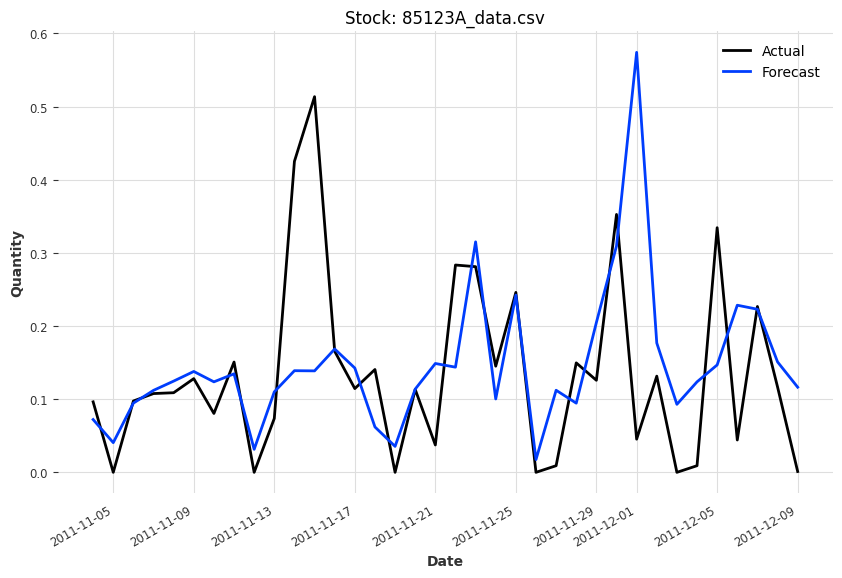

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


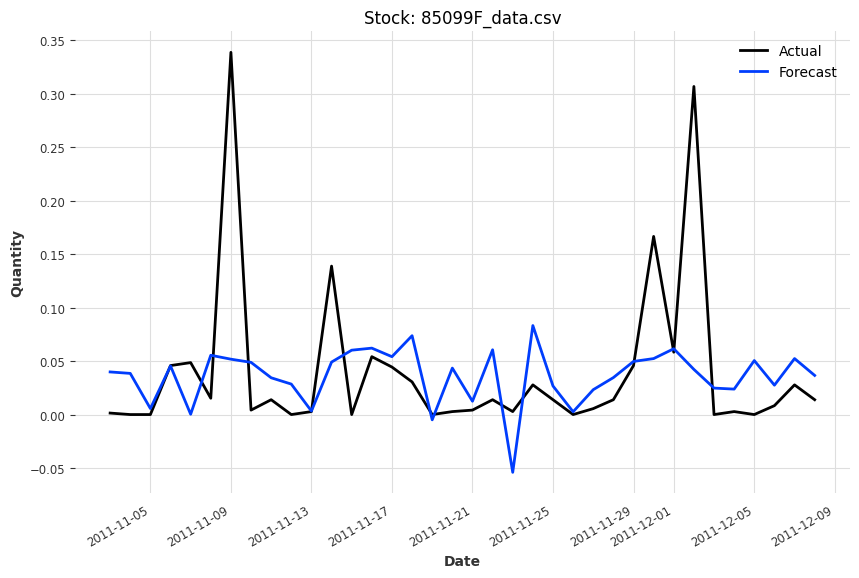

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.09


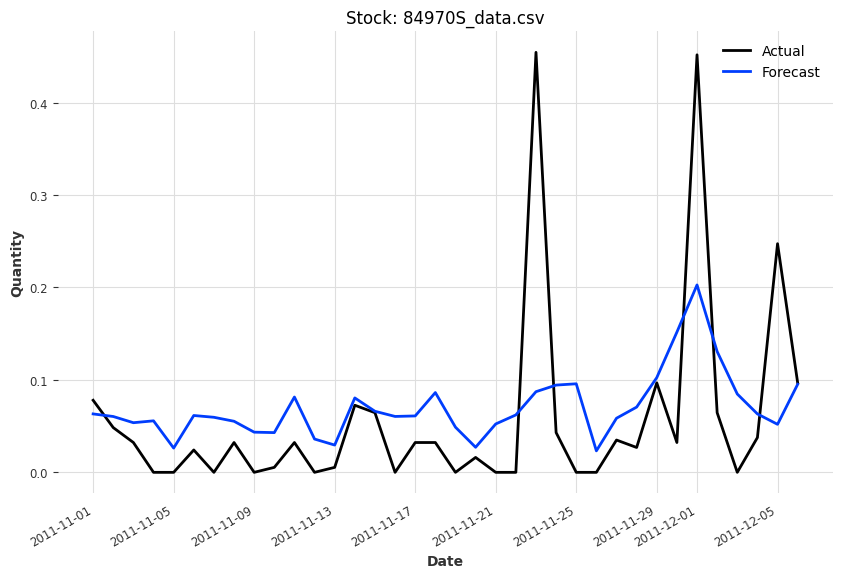

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.11


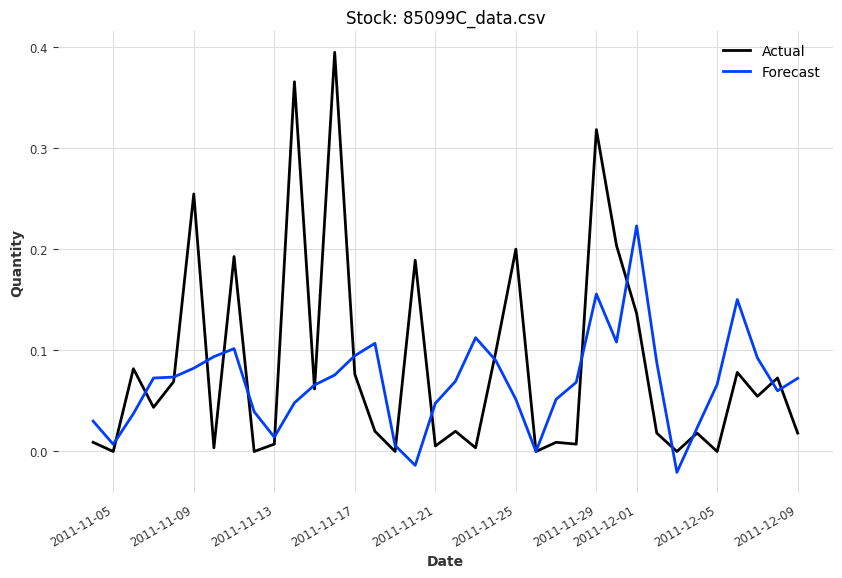

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.07


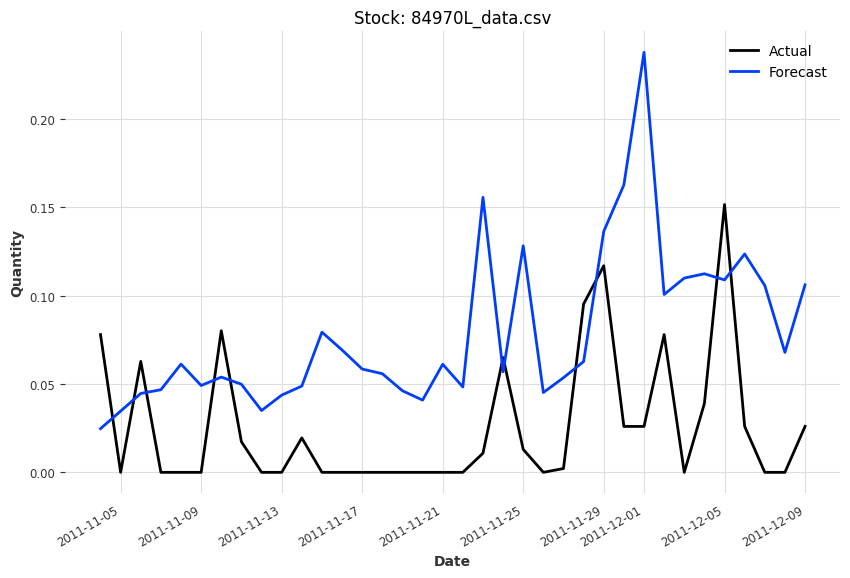

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.14


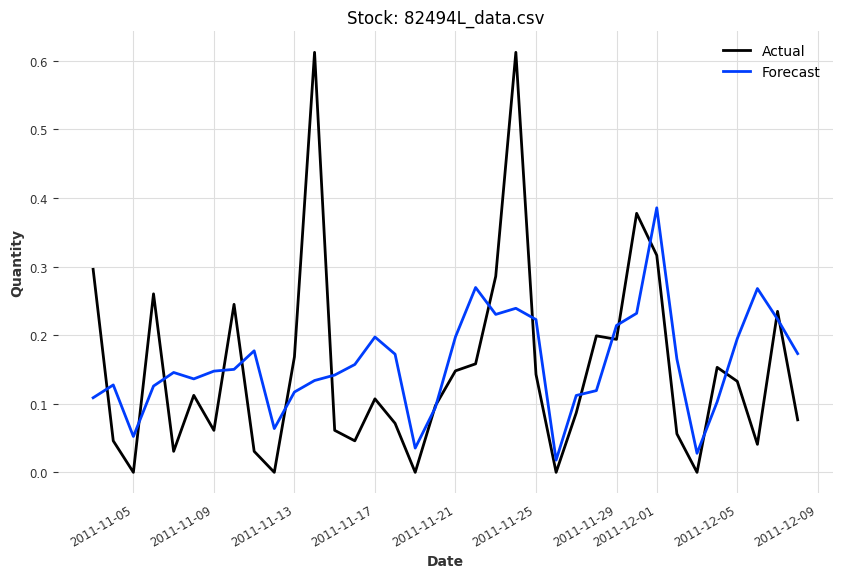

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08


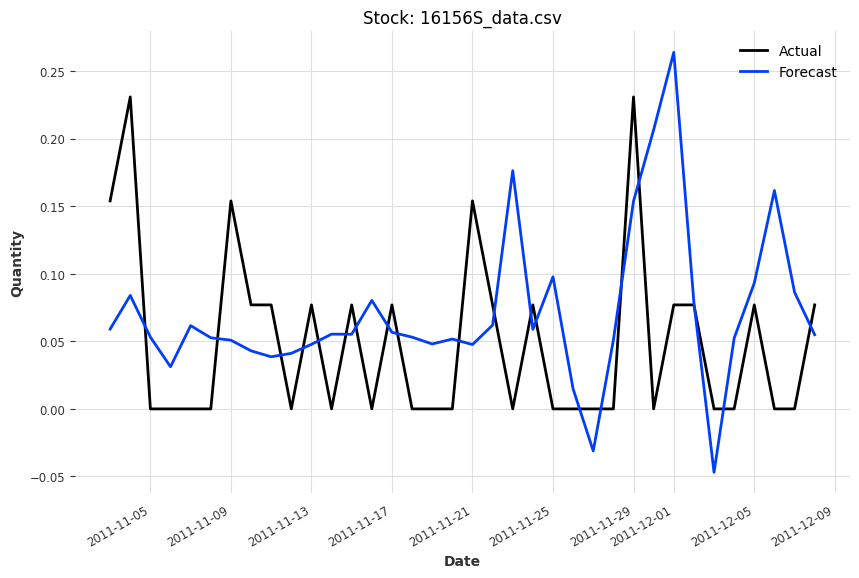

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18


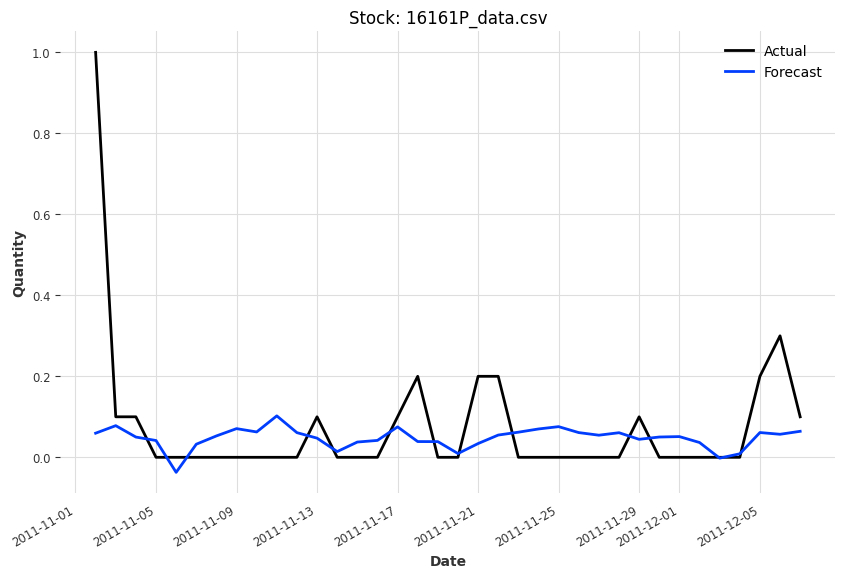

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Metrics for Model Evaluation
Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15


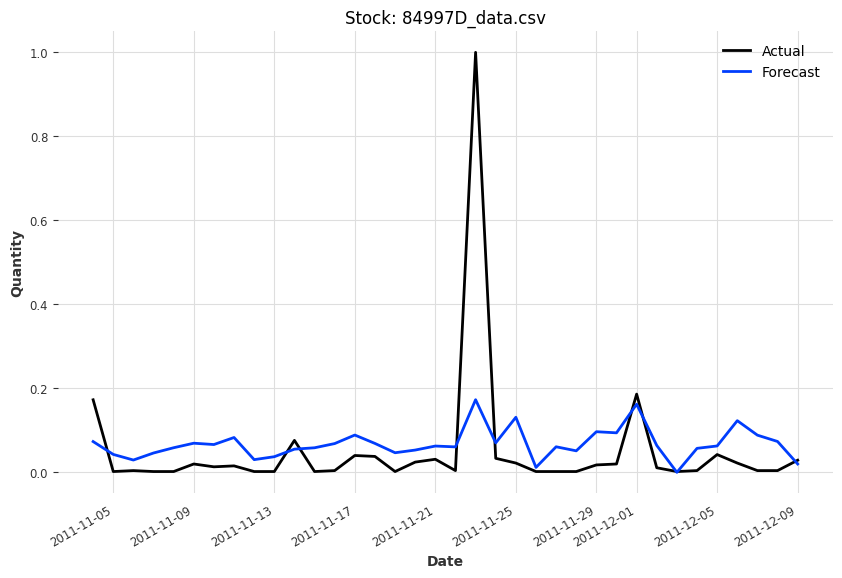

In [90]:
#Predicting
model_predict(TCN_model)

# Comparison of Darts Model

In [91]:
#Installing Prettytable library to put all results
!pip install prettytable

In [92]:
#defining model for model comparison
def model_comparison(model):
    data = {}

    for key in training_data:
        # Make predictions for the validation set
        pred = model.predict(n=36, series=training_data[key], past_covariates=all_stock_dataframes_timeseries_temp_scaled[key])

        # Extract actual and predicted time series data
        actual = val_data[key][-36:].values().reshape(-1, 1)
        predicted = pred.values().reshape(-1, 1)

        # Add a small constant to avoid division by zero in MAPE
        epsilon = 1e-10
        mape = np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

        # Calculate other metrics
        mae = mean_absolute_error(actual, predicted)
        mse = mean_squared_error(actual, predicted)
        rmse = np.sqrt(mse)

        # Store metrics in the data dictionary
        data[key] = [round(mae, 2), round(mse, 2), round(rmse, 2)]

    return data


In [93]:
table_model_Nbeatsmodel = model_comparison(model_Nbeatsmodel)
table_TiDEModel = model_comparison(TiDEModel)
table_BlockRNN_test = model_comparison(BlockRNN_test)
table_TCN_model = model_comparison(TCN_model)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

In [94]:
# Creating comparison table for DARTS model
for key in training_data:
    print("Product Name: {}".format(key))

    table = PrettyTable()
    table.field_names = ["Model", "MAE", "MSE", "RMSE"]

    if key in table_model_Nbeatsmodel:
        table.add_row(["NBEATSModel", *table_model_Nbeatsmodel[key]])
    if key in table_BlockRNN_test:
        table.add_row(["BlockRNNTest", *table_BlockRNN_test[key]])
    if key in table_TiDEModel:
        table.add_row(["TiDEModel", *table_TiDEModel[key]])
    if key in table_TCN_model:
        table.add_row(["TCNModel", *table_TCN_model[key]])

    # Print the table
    print(table)
    print("\n")

Product Name: 85099B_data.csv
+--------------+------+------+------+
|    Model     | MAE  | MSE  | RMSE |
+--------------+------+------+------+
| NBEATSModel  | 0.11 | 0.02 | 0.15 |
| BlockRNNTest | 0.13 | 0.03 | 0.18 |
|  TiDEModel   | 0.12 | 0.04 | 0.19 |
|   TCNModel   | 0.06 | 0.01 | 0.11 |
+--------------+------+------+------+


Product Name: 85123A_data.csv
+--------------+------+------+------+
|    Model     | MAE  | MSE  | RMSE |
+--------------+------+------+------+
| NBEATSModel  | 0.09 | 0.02 | 0.13 |
| BlockRNNTest | 0.13 | 0.04 | 0.2  |
|  TiDEModel   | 0.1  | 0.03 | 0.16 |
|   TCNModel   | 0.08 | 0.02 | 0.14 |
+--------------+------+------+------+


Product Name: 85099F_data.csv
+--------------+------+------+------+
|    Model     | MAE  | MSE  | RMSE |
+--------------+------+------+------+
| NBEATSModel  | 0.08 | 0.01 | 0.1  |
| BlockRNNTest | 0.05 | 0.01 | 0.08 |
|  TiDEModel   | 0.06 | 0.01 | 0.1  |
|   TCNModel   | 0.04 | 0.01 | 0.08 |
+--------------+------+------+--

In [100]:
# making dictionary for Combining the results of all models
all_results = {
    "NBEATSModel": table_model_Nbeatsmodel,
    "BlockRNNTest": table_BlockRNN_test,
    "TiDEModel": table_TiDEModel,
    "TCNModel": table_TCN_model
}

# Calculate mean performance metrics for each model
mean_metrics = {}
for model, results in all_results.items():
    mean_mae = sum([metrics[0] for metrics in results.values()]) / len(results)
    mean_mse = sum([metrics[1] for metrics in results.values()]) / len(results)
    mean_rmse = sum([metrics[2] for metrics in results.values()]) / len(results)
    mean_metrics[model] = [mean_mae, mean_mse, mean_rmse]

# Finding the model with the lowest mean metrics
best_model = min(mean_metrics, key=lambda x: mean_metrics[x])

print("Mean Performance Metrics Across All Products:")
print("Model\t\t\tMAE\t\tMSE\t\tRMSE")
for model, metrics in mean_metrics.items():
    print(f"{model}\t\t{metrics[0]:.2f}\t\t{metrics[1]:.2f}\t\t{metrics[2]:.2f}")

# Printing the best model
print("\nThe best model based on mean performance metrics: ", best_model)


Mean Performance Metrics Across All Products:
Model			MAE		MSE		RMSE
NBEATSModel		0.09		0.02		0.13
BlockRNNTest		0.09		0.02		0.13
TiDEModel		0.09		0.03		0.15
TCNModel		0.07		0.01		0.11

The best model based on mean performance metrics:  TCNModel


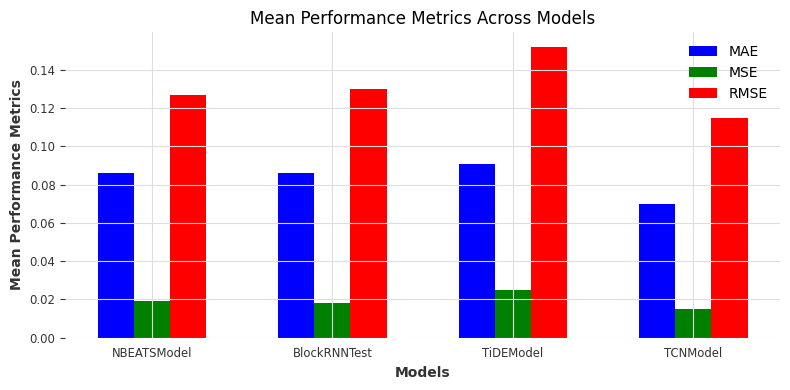

In [101]:
# Models and their mean metrics
models = list(mean_metrics.keys())
mean_maes = [metrics[0] for metrics in mean_metrics.values()]
mean_mses = [metrics[1] for metrics in mean_metrics.values()]
mean_rmses = [metrics[2] for metrics in mean_metrics.values()]

# Plotting
fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 0.2
index = np.arange(len(models))

# Plotting MAE
bar1 = ax.bar(index - bar_width, mean_maes, bar_width,  label='MAE', color='b', capsize=0)
# Plotting MSE
bar2 = ax.bar(index, mean_mses, bar_width,  label='MSE', color='g', capsize=0)
# Plotting RMSE
bar3 = ax.bar(index + bar_width, mean_rmses, bar_width,  label='RMSE', color='r', capsize=0)

ax.set_xlabel('Models')
ax.set_ylabel('Mean Performance Metrics')
ax.set_title('Mean Performance Metrics Across Models')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

plt.xticks()
plt.tight_layout()
plt.show()
